### Project Description

Analysis of four years of daily sales records to provide insights and support data-driven decision-making for "Operation Increase Sales and Profit" (OISP); a campaign that aims to boost sales and maximize profit for a multinational retail company.

### Possible questions may of interest.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


# Using CRISP-DM Framework

## 1. Business Issue Understanding

<b> a. Objectives of the project (What decisions need to be made?) </b>

Find a means of increasing sales and profit as intended in the compaign: "Operation Increase Sales and Profit" 

<b> b. What information is needed to inform these decisions?</b>

All sales record from retail company

<b> c. What type of analysis can provide the information needed to inform these decisions?</b>

We'll start with some;

+ Descriptive Analysis : which will condense the large volume of data into a clear, simple overview of what has happened

+ Diagnostic Analysis :  explore why it happened
+ Predictive Analysis : build on what happened in the past and why to predict what is likely to happen in the future
+ Prescriptive analysis : looks at what has happened, why it happened, and what might happen in order to determine the best course of action for the future

## 2. Data Understanding

<b> a. What data is needed?</b>

All sales record from retail company

<b> b. What data is available?</b>

Four year daily sales records of the multinational retail company (2011 - 2014)

<b> c. What are the important characteristics of the data? </b>
+ Sales from all countries
+ Profits from all countries
+ Losses from all countries
+ Types of products sold
+ Timeline of sales


## 3. Data Preparation

<b>Steps</b>
    
+ Collect data needed
    + ~Load the data.~ 
+ Describe data
    + ~Inspect the data~
+ Verify Data Quality (how clean or dirty is the data?)
+ Data Cleaning
    + ~Check for missing values~
    + ~Check the different categories in the categorical variables~
    + ~Check the data of each column (format data)~
    + Take a view of the data
    + ~Take the descritive statistics for the numerical variables~
    + ~Check the distribution of the variables~
    + ~Feature Engineering~; Create columns for:
        + ~Unit price (sale/quantity)~
        + ~Year~
        + ~Month~
        + ~Interval between the order date and the shipping date in days~

+ Explore Data 

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import missingno as msno
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


### Loading Data

In [2]:
# Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

### Inspecting Data

In [3]:
# Printing first five values of dataframe
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
# Printing out all columns
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [5]:
# Dimension of data
data.shape

(51290, 24)

In [6]:
# Printing a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### Dealing with missing values

In [7]:
# Printing number of nul values per column
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

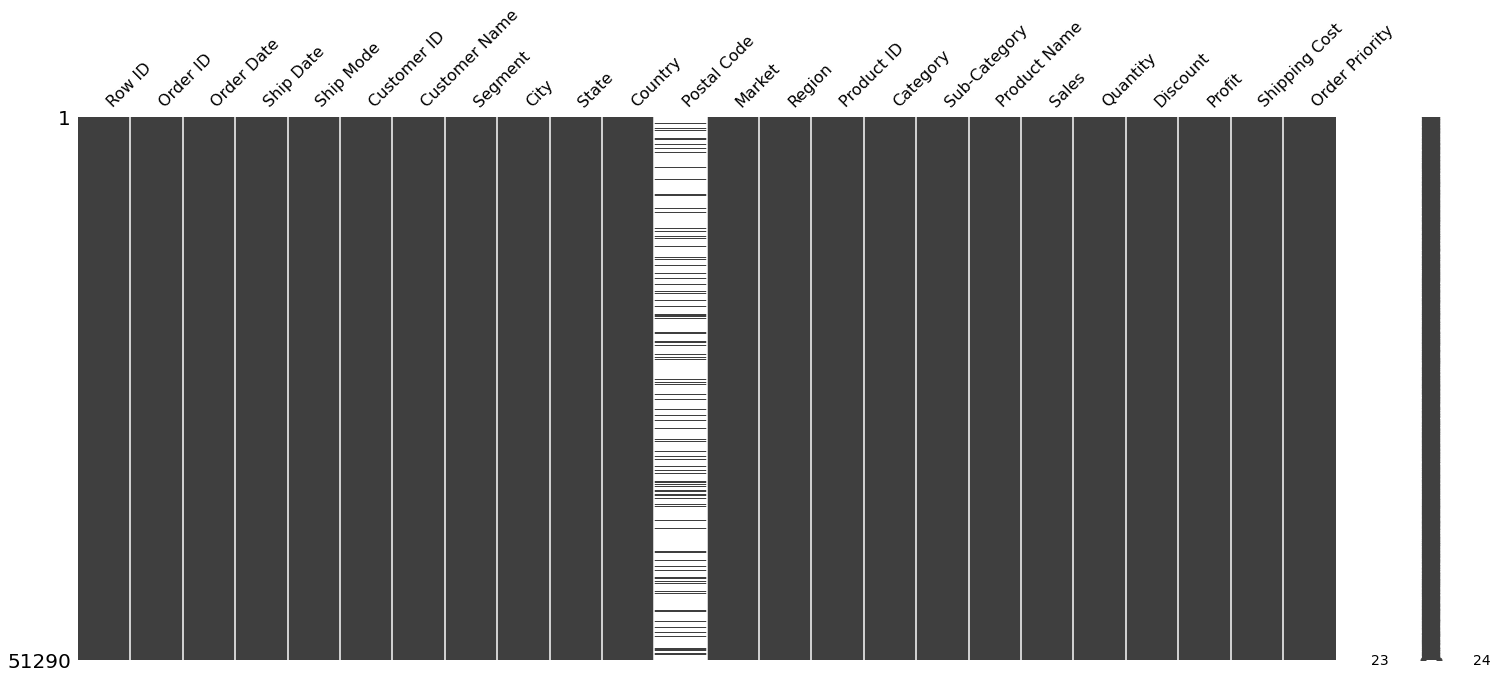

In [8]:
# visualizing missing values
msno.matrix(data,color=(0.25, 0.25, 0.25))
plt.show()

#### Observation

* There are null values only in the Postal Code column as not all countries have a postal code
+ Postal Code column may be dropped as it will not affect the analysis of the data
* Order ID could be set as index if unique
* Ship mode, Segment, Category, Sub-Category, Market, Region and Order Priority could be categorical data type

### Dropping Postal Code column

In [9]:
data.drop('Postal Code', axis=1, inplace=True)

In [10]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [11]:
# column has clearly been dropped as the columns are now 23 instead of 24
data.shape

(51290, 23)

### Checking the different categories in the categorical variables


In [12]:
# Printing all unique values from 'Segment' column
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [13]:
# Printing all unique values from 'Ship Mode' column
data['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
# Printing all unique values from 'Category' column
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [15]:
# Printing all unique values from 'Sub-Category' column
data['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [16]:
# Printing all unique values from 'Order Priority' column
data['Order Priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [17]:
# Printing all unique values from 'Market' column
data['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [18]:
# Printing all unique values from 'Region' column
data['Region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

### Updating Data Types

In [19]:
# Changing 'Segment' column data type to 'category'
data['Segment'] = data['Segment'].astype('category')

In [20]:
# Changing 'Ship Mode' column data type to 'category'
data['Ship Mode'] = data['Ship Mode'].astype('category')

In [21]:
# Changing 'Category' column data type to 'category'
data['Category'] = data['Category'].astype('category')

In [22]:
# Changing 'Sub-Category' column data type to 'category'
data['Sub-Category'] = data['Sub-Category'].astype('category')

In [23]:
# Changing 'Order Priority' column data type to 'category'
data['Order Priority'] = data['Order Priority'].astype('category')

In [24]:
# Changing 'Market' column data type to 'category'
data['Market'] = data['Market'].astype('category')

In [25]:
# Changing 'Region' column data type to 'category'
data['Region'] = data['Region'].astype('category')

In [26]:
#Data types have been updated
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  category      
 12  Region          51290 non-null  category      
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  category      
 15  Su

### Setting new Index

In [27]:
#Checking if 'Order ID' has only unique numbers
data['Order ID'].is_unique

False

In [28]:
#Checking if 'Row ID' has only unique numbers
data['Row ID'].is_unique

True

#### Observation
+ Order ID is NOT unique and hence CANNOT be used as index

+ Row ID, however is unique and will be used as index


In [29]:
# setting 'Row ID as index of the DataFrame'
data.set_index('Row ID', inplace=True)

In [30]:
# 'Row ID is now the index'
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,,
42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [31]:
# Sorting DataFrame by 'Row ID' in ascending order
data.sort_values('Row ID', ascending=True, inplace=True)

In [32]:
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium


### Checking the data of each column

**ORDER ID**

In [33]:
data['Order ID'].nunique()

25035

In [34]:
data.groupby('Order ID')['Sales', 'Profit'].sum()

,Sales,Profit
Order ID,,
AE-2011-9160,161.082,-246.078
AE-2013-1130,228.996,-236.964
AE-2013-1530,23.634,-38.076
AE-2014-2840,42.480,-75.060
AE-2014-3830,281.502,-429.108
...,...,...
ZI-2014-7160,51.075,-96.135
ZI-2014-7610,25.578,-30.312
ZI-2014-9540,7.164,-6.696


In [36]:
data[data['Order ID'] == 'AE-2014-3830']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,,
43922,AE-2014-3830,2014-12-13,2014-12-19,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,EMEA,OFF-BIC-10002270,Office Supplies,Art,"BIC Pencil Sharpener, Water Color",77.256,8,0.7,-82.584,4.08,Medium
43923,AE-2014-3830,2014-12-13,2014-12-19,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,EMEA,OFF-AVE-10000357,Office Supplies,Binders,"Avery Binder Covers, Clear",3.159,1,0.7,-4.971,0.25,Medium
43924,AE-2014-3830,2014-12-13,2014-12-19,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,EMEA,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue",59.373,1,0.7,-118.767,5.83,Medium
43925,AE-2014-3830,2014-12-13,2014-12-19,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,EMEA,OFF-ROG-10003993,Office Supplies,Storage,"Rogers File Cart, Single Width",42.489,1,0.7,-62.331,2.24,Medium
43926,AE-2014-3830,2014-12-13,2014-12-19,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,EMEA,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",95.796,4,0.7,-156.564,6.73,Medium
43927,AE-2014-3830,2014-12-13,2014-12-19,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,EMEA,OFF-AVE-10004827,Office Supplies,Binders,"Avery Binder Covers, Recycled",3.429,1,0.7,-3.891,0.25,Medium


#### Observation
+ Order numbers refer to the each order
+ All orders made together get the same order ID eg. if a person orders fasteners and bookcases, both have the same Order ID as they were bought as one order. Hence,
+ There are repeated order numbers in the dataset
+ The unique Order ID's are 25035

**ORDER DATE**

In [37]:
data['Order Date'].describe()

count                   51290
unique                   1430
top       2014-06-18 00:00:00
freq                      135
first     2011-01-01 00:00:00
last      2014-12-31 00:00:00
Name: Order Date, dtype: object

+ The date the order was placed ranged between 1/1/2011 and 31/12/2014
+ The day with the most frequent orders is 18th June, 2014 (135 orders) (why? Is this a june thing?)
+ There are 1430 unique order Dates 


**Extracting Year from Order Date**

In [38]:
# Exrtracting order year from 'Order Date' column and assigning it to new column 'Order Year'
data['Order Year'] = data['Order Date'].dt.year

**Extracting Month from Order Date**

In [39]:
# Exrtracting order month from 'Order Date' column and assigning it to new column 'Order Month' as an integer
data['Order Month'] = data['Order Date'].dt.month

In [40]:
# Exrtracting order month from 'Order Date' column and assigning it to new column 'Order Month Name' as an object
data['Order Month Name'] = data['Order Date'].dt.month_name()

In [41]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,2012,10,October
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,2012,10,October
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,2012,10,October


**Visualizing The Sales after Discount per Year**

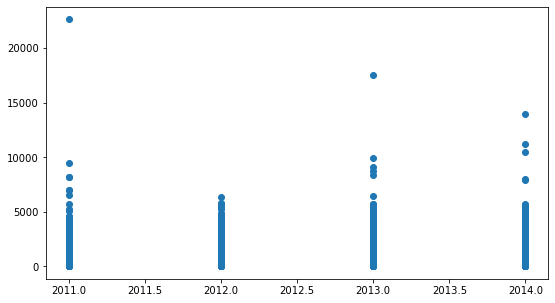

In [42]:
# Scatter plot of total sales per year
fig, ax= plt.subplots(figsize=(9,5))
ax.scatter(x= data['Order Year'], y=data['Sales']);
plt.show()

#### Observation
+ Most of the sales across the years can be found below 10,000
+ However, there are some outliers 
    + In 2011, a sale above 20,000
    + In 2013, a sale above 15,000 but below 20,000
    + In 2014, about 2 sales above 10,000 but below 15,000
+ No outliers in 2012

*THE OUTLIERS PER YEAR ARE AS FOLLOWS*

*2011*

+ Machine  under Technology Category

In [43]:
data[data['Sales'] > 20000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,
33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,United States,US,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,6,0.5,-1811.0784,24.29,Medium,2011,3,March


*2013*

  + Copier under Technology Category

In [44]:
data[(data['Sales'] > 15000) & (data['Sales'] < 20000)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,
38123,CA-2013-118689,2013-03-10,2013-10-10,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,349.07,Medium,2013,3,March


*2014*

  + All copiers under Technology Category

In [45]:
data[(data['Sales'] > 10000) & (data['Sales'] < 15000)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,
33920,CA-2014-127180,2014-10-23,2014-10-25,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,United States,US,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,45.98,High,2014,10,October
35487,CA-2014-166709,2014-11-18,2014-11-23,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,United States,US,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,363.19,Medium,2014,11,November
39450,CA-2014-140151,2014-03-24,2014-03-26,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,United States,US,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,20.00,Medium,2014,3,March


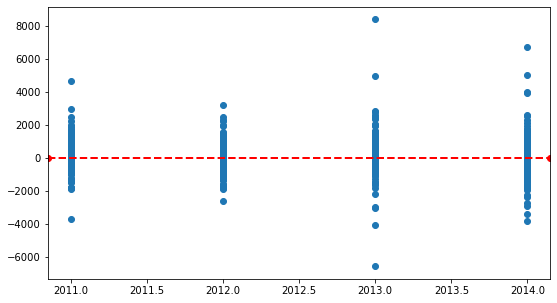

In [46]:
#Scatter Plot of Order Year against Profit/Loss

fig, ax= plt.subplots(figsize=(9,5))
ax.scatter(x= data['Order Year'], y=data['Profit']);

# Using the plt.axhline method to render the horizontal line at y=0 to differenciate losses from profits
ax.axhline(y=0, color='red', marker='o', linestyle='--', linewidth = 2);
plt.show()

#### Observation

+ There are as many losses as there are profits per year which sort of cancels out all profits, produces very little profit overall or drives the year into a loss
+ 2013 recorded the larges profit as well as the largest loss within the four year period

In [47]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,2012,10,October
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,2012,10,October
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,2012,10,October


In [48]:
# Creating new column 'Duration' which shows how long each order takes to ship after ordering
data['Duration'] = data['Ship Date'] - data['Order Date']

In [49]:
# Printing first five rows of data
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February,120 days
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October,5 days
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,2012,10,October,5 days
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,2012,10,October,5 days
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,2012,10,October,5 days


In [50]:
# Generating descriptive statistics of duration column
data['Duration'].describe()

count                         51290
mean      5 days 01:53:49.120686293
std      97 days 18:30:57.003928097
min             -322 days +00:00:00
25%                 1 days 00:00:00
50%                 4 days 00:00:00
75%                59 days 00:00:00
max               214 days 00:00:00
Name: Duration, dtype: object

### Observation
* The lowest Duration taken for an order to be shipped is -322 days which essentially means the order was shipped 322 days before it was ordered. 
* Why would an order be shipped almost a year before it is ordered?

In [51]:
# All data with duration of -322 days
data[data['Duration'] == '-322 days']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,
9107,MX-2012-156678,2012-11-29,2012-01-12,Second Class,EM-13810,Eleni McCrary,Corporate,Andradina,São Paulo,Brazil,LATAM,South,TEC-PH-10001587,Technology,Phones,"Apple Headset, Cordless",152.220,3,0.0,25.860,44.77,Critical,2012,11,November,-322 days
14582,IT-2012-4240389,2012-11-29,2012-01-12,Second Class,ST-20530,Shui Tom,Consumer,Milan,Lombardy,Italy,EU,South,FUR-CH-10001043,Furniture,Chairs,"Harbour Creations Bag Chairs, Red",73.944,3,0.6,-31.446,3.24,Medium,2012,11,November,-322 days
16996,IT-2011-3270900,2011-11-30,2011-01-12,First Class,AW-10840,Anthony Witt,Consumer,Amsterdam,North Holland,Netherlands,EU,Central,FUR-CH-10000745,Furniture,Chairs,"Hon Chairmat, Adjustable",87.030,3,0.5,-45.270,20.78,Critical,2011,11,November,-322 days
16997,IT-2011-3270900,2011-11-30,2011-01-12,First Class,AW-10840,Anthony Witt,Consumer,Amsterdam,North Holland,Netherlands,EU,Central,TEC-CO-10000556,Technology,Copiers,"HP Wireless Fax, Laser",1440.840,8,0.5,-1268.040,367.35,Critical,2011,11,November,-322 days
16998,IT-2011-3270900,2011-11-30,2011-01-12,First Class,AW-10840,Anthony Witt,Consumer,Amsterdam,North Holland,Netherlands,EU,Central,OFF-FA-10004605,Office Supplies,Fasteners,"OIC Clamps, Assorted Sizes",17.220,2,0.5,-4.860,5.95,Critical,2011,11,November,-322 days
17079,ES-2011-4450646,2011-11-30,2011-01-12,First Class,VB-21745,Victoria Brennan,Corporate,Paris,Ile-de-France,France,EU,Central,OFF-BI-10001723,Office Supplies,Binders,"Avery Binder, Clear",61.800,5,0.0,6.150,7.47,High,2011,11,November,-322 days
17080,ES-2011-4450646,2011-11-30,2011-01-12,First Class,VB-21745,Victoria Brennan,Corporate,Paris,Ile-de-France,France,EU,Central,FUR-CH-10002970,Furniture,Chairs,"Harbour Creations Chairmat, Black",688.743,11,0.1,83.853,103.97,High,2011,11,November,-322 days
26739,IN-2012-10041,2012-11-29,2012-01-12,Second Class,CR-12580,Clay Rozendal,Home Office,Queanbeyan,New South Wales,Australia,APAC,Oceania,OFF-SU-10003665,Office Supplies,Supplies,"Kleencut Trimmer, Serrated",343.170,10,0.1,11.370,66.31,Critical,2012,11,November,-322 days
26740,IN-2012-10041,2012-11-29,2012-01-12,Second Class,CR-12580,Clay Rozendal,Home Office,Queanbeyan,New South Wales,Australia,APAC,Oceania,OFF-AR-10002727,Office Supplies,Art,"Stanley Pencil Sharpener, Fluorescent",89.208,4,0.1,17.808,7.46,Critical,2012,11,November,-322 days


In [52]:
# Assigning all orders which were shipped before they were ordered to ship_before_order
ship_before_order = data[data['Duration'] < '0 days']

In [53]:
ship_before_order

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,
7,MX-2013-134096,2013-09-27,2013-01-10,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,Brazil,LATAM,South,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0.0,21.32,4.11,Medium,2013,9,September,-260 days
8,MX-2013-134096,2013-09-27,2013-01-10,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,Brazil,LATAM,South,TEC-MA-10004956,Technology,Machines,"Konica Card Printer, Red",344.64,3,0.0,165.42,26.20,Medium,2013,9,September,-260 days
9,MX-2013-134096,2013-09-27,2013-01-10,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,Brazil,LATAM,South,OFF-SU-10003474,Office Supplies,Supplies,"Elite Box Cutter, Easy Grip",97.36,4,0.0,19.44,6.86,Medium,2013,9,September,-260 days
10,MX-2013-134096,2013-09-27,2013-01-10,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,Brazil,LATAM,South,TEC-AC-10001830,Technology,Accessories,"Enermax Router, Erganomic",341.52,2,0.0,13.64,17.34,Medium,2013,9,September,-260 days
11,MX-2013-134096,2013-09-27,2013-01-10,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,Brazil,LATAM,South,OFF-BI-10002075,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Durable",12.06,3,0.0,3.48,1.13,Medium,2013,9,September,-260 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51259,MD-2014-4350,2014-09-30,2014-02-10,Second Class,AP-915,Arthur Prichep,Consumer,Chisinau,Chisinau,Moldova,EMEA,EMEA,OFF-AVE-10004312,Office Supplies,Binders,"Avery Index Tab, Clear",6.33,1,0.0,0.24,0.32,Medium,2014,9,September,-232 days
51260,MD-2014-4350,2014-09-30,2014-02-10,Second Class,AP-915,Arthur Prichep,Consumer,Chisinau,Chisinau,Moldova,EMEA,EMEA,TEC-SAM-10003538,Technology,Phones,"Samsung Speaker Phone, Full Size",124.53,1,0.0,29.88,12.37,Medium,2014,9,September,-232 days
51261,MD-2014-4350,2014-09-30,2014-02-10,Second Class,AP-915,Arthur Prichep,Consumer,Chisinau,Chisinau,Moldova,EMEA,EMEA,OFF-ACC-10000102,Office Supplies,Binders,"Acco Binding Machine, Clear",303.30,6,0.0,33.30,58.22,Medium,2014,9,September,-232 days


In [54]:
ship_before_order['Order Year'].describe()

count    9687.000000
mean     2012.785589
std         1.090745
min      2011.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2014.000000
Name: Order Year, dtype: float64

### Observation
+ These were from 2011 to 2014 (no specific year)
+ Orders where shipping preceded order are about 9687
+ What's common with these types of orders? 

In [55]:
# Unique Regions in ship_before_order
ship_before_order['Region'].unique()

['South', 'Central', 'North', 'Caribbean', 'Central Asia', ..., 'West', 'East', 'EMEA', 'Africa', 'Canada']
Length: 13
Categories (13, object): ['South', 'Central', 'North', 'Caribbean', ..., 'East', 'EMEA', 'Africa', 'Canada']

In [56]:
# Unique Segment in ship_before_order
ship_before_order['Segment']

Row ID
7        Consumer
8        Consumer
9        Consumer
10       Consumer
11       Consumer
           ...   
51259    Consumer
51260    Consumer
51261    Consumer
51262    Consumer
51263    Consumer
Name: Segment, Length: 9687, dtype: category
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']

In [57]:
# Unique Category in ship_before_order
ship_before_order['Category']

Row ID
7        Office Supplies
8             Technology
9        Office Supplies
10            Technology
11       Office Supplies
              ...       
51259    Office Supplies
51260         Technology
51261    Office Supplies
51262         Technology
51263    Office Supplies
Name: Category, Length: 9687, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

In [58]:
# Sub-Categories in ship_before_order
ship_before_order['Sub-Category']

Row ID
7          Envelopes
8           Machines
9           Supplies
10       Accessories
11           Binders
            ...     
51259        Binders
51260         Phones
51261        Binders
51262       Machines
51263        Binders
Name: Sub-Category, Length: 9687, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage', 'Supplies', 'Tables']

In [59]:
# Order Priorities in ship_before_order
ship_before_order['Order Priority']

Row ID
7        Medium
8        Medium
9        Medium
10       Medium
11       Medium
          ...  
51259    Medium
51260    Medium
51261    Medium
51262    Medium
51263    Medium
Name: Order Priority, Length: 9687, dtype: category
Categories (4, object): ['Critical', 'High', 'Low', 'Medium']

In [60]:
# Ship Modes in ship_before_order
ship_before_order['Ship Mode']

Row ID
7        Standard Class
8        Standard Class
9        Standard Class
10       Standard Class
11       Standard Class
              ...      
51259      Second Class
51260      Second Class
51261      Second Class
51262    Standard Class
51263    Standard Class
Name: Ship Mode, Length: 9687, dtype: category
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']

### Observation
+ So far, it's not particular to any category in the sense that every type of category shows up with regards to such orders

**Unit Price Column**

In [61]:
data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February,120 days
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October,5 days


In [62]:
# Assingning all 'Tenex Lockers, Blue' products to tenex_lockers for analysis
tenex_lockers = data[data['Product Name'] == 'Tenex Lockers, Blue']

In [63]:
tenex_lockers.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,
924,MX-2014-166135,2014-09-17,2014-09-19,First Class,EL-13735,Ed Ludwig,Home Office,Santa Catarina,Nuevo León,Mexico,LATAM,North,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,3,0.0,44.88,91.14,High,2014,9,September,2 days
1649,MX-2011-160108,2011-05-14,2011-05-19,Standard Class,SG-20080,Sandra Glassco,Consumer,San Salvador,San Salvador,El Salvador,LATAM,Central,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",952.70,7,0.0,104.72,74.59,Medium,2011,5,May,5 days
5202,MX-2011-100587,2011-09-26,2011-01-10,Second Class,SC-20050,Sample Company A,Home Office,Bogotá,Bogota,Colombia,LATAM,South,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",272.20,2,0.0,29.92,11.27,Medium,2011,9,September,-259 days
5439,MX-2013-118941,2013-10-20,2013-10-26,Standard Class,EA-14035,Erin Ashbrook,Corporate,Tijuana,Baja California,Mexico,LATAM,North,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,3,0.0,44.88,48.14,Medium,2013,10,October,6 days
8594,US-2014-103828,2014-05-06,2014-10-06,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Tegucigalpa,Francisco Morazán,Honduras,LATAM,Central,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",244.98,3,0.4,-118.44,17.51,Medium,2014,5,May,153 days


In [64]:
# Creating unit price column by dividing sales by quantity
tenex_lockers['unit_price'] = (tenex_lockers['Sales'])/(tenex_lockers['Quantity'])

In [65]:
tenex_lockers.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,unit_price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
924,MX-2014-166135,2014-09-17,2014-09-19,First Class,EL-13735,Ed Ludwig,Home Office,Santa Catarina,Nuevo León,Mexico,LATAM,North,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,3,0.0,44.88,91.14,High,2014,9,September,2 days,136.10
1649,MX-2011-160108,2011-05-14,2011-05-19,Standard Class,SG-20080,Sandra Glassco,Consumer,San Salvador,San Salvador,El Salvador,LATAM,Central,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",952.70,7,0.0,104.72,74.59,Medium,2011,5,May,5 days,136.10
5202,MX-2011-100587,2011-09-26,2011-01-10,Second Class,SC-20050,Sample Company A,Home Office,Bogotá,Bogota,Colombia,LATAM,South,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",272.20,2,0.0,29.92,11.27,Medium,2011,9,September,-259 days,136.10
5439,MX-2013-118941,2013-10-20,2013-10-26,Standard Class,EA-14035,Erin Ashbrook,Corporate,Tijuana,Baja California,Mexico,LATAM,North,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,3,0.0,44.88,48.14,Medium,2013,10,October,6 days,136.10
8594,US-2014-103828,2014-05-06,2014-10-06,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Tegucigalpa,Francisco Morazán,Honduras,LATAM,Central,OFF-ST-10003929,Office Supplies,Storage,"Tenex Lockers, Blue",244.98,3,0.4,-118.44,17.51,Medium,2014,5,May,153 days,81.66


### Observation

+ The sales column is sales after discount as all unit prices are not the same for 'Tenex Lockers, Blue' as expected. 
+ The one with a 0.4 discount recorded a lower sale and the ones without a discount have the same sales

In [66]:
tenex_clock = data[data['Product Name'] == 'Tenex Clock, Durable']

In [67]:
tenex_clock.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.160,8,0.0,90.720,13.45,Medium,2012,10,October,5 days
501,MX-2013-142118,2013-06-28,2013-02-07,Second Class,EB-13705,Ed Braxton,Corporate,Apartadó,Antioquia,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",63.040,2,0.0,22.680,4.44,Medium,2013,6,June,-141 days
627,US-2014-112690,2014-09-19,2014-09-23,Second Class,AR-10570,Anemone Ratner,Consumer,Miguel Hidalgo,Distrito Federal,Mexico,LATAM,North,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",56.736,3,0.4,-3.804,9.95,Medium,2014,9,September,4 days
1445,US-2014-140375,2014-02-05,2014-07-05,Second Class,SU-20665,Stephanie Ulpright,Home Office,Callao,Callao,Peru,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",18.912,1,0.4,-1.268,0.45,Medium,2014,2,February,150 days
1755,US-2011-161984,2011-09-23,2011-09-25,First Class,CC-12145,Charles Crestani,Consumer,San Pedro Sula,Cortés,Honduras,LATAM,Central,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",56.736,3,0.4,-3.804,16.33,High,2011,9,September,2 days


In [68]:
tenex_clock['unit_price'] = (tenex_clock['Sales'])/(tenex_clock['Quantity'])

In [69]:
tenex_clock.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,unit_price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.160,8,0.0,90.720,13.45,Medium,2012,10,October,5 days,31.520
501,MX-2013-142118,2013-06-28,2013-02-07,Second Class,EB-13705,Ed Braxton,Corporate,Apartadó,Antioquia,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",63.040,2,0.0,22.680,4.44,Medium,2013,6,June,-141 days,31.520
627,US-2014-112690,2014-09-19,2014-09-23,Second Class,AR-10570,Anemone Ratner,Consumer,Miguel Hidalgo,Distrito Federal,Mexico,LATAM,North,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",56.736,3,0.4,-3.804,9.95,Medium,2014,9,September,4 days,18.912
1445,US-2014-140375,2014-02-05,2014-07-05,Second Class,SU-20665,Stephanie Ulpright,Home Office,Callao,Callao,Peru,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",18.912,1,0.4,-1.268,0.45,Medium,2014,2,February,150 days,18.912
1755,US-2011-161984,2011-09-23,2011-09-25,First Class,CC-12145,Charles Crestani,Consumer,San Pedro Sula,Cortés,Honduras,LATAM,Central,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",56.736,3,0.4,-3.804,16.33,High,2011,9,September,2 days,18.912


### Observation

+ Tried the same for Tenex Clocks to confirm observation

In [70]:
# Assigning Sales column to new column, Discounted Price to give clarity
data['Discounted Price'] = data['Sales']

In [71]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60


In [72]:
# Creating new column 'Actual Price'
data['Actual Price'] = (data['Discounted Price'])/(1 - data['Discount'])

In [73]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60


### Creating 'binder' DataFrame to assess my unit price column

In [74]:
binder = data[data['Product Name'] == 'Cardinal Binder, Clear']

In [75]:
binder

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.4400,4,0.00,4.9600,1.37,Medium,2012,10,October,5 days,35.4400,35.44
448,MX-2012-133893,2012-07-29,2012-02-08,Standard Class,JO-15550,Jesus Ocampo,Home Office,Itapetininga,São Paulo,Brazil,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",8.8600,1,0.00,1.2400,0.56,Medium,2012,7,July,-172 days,8.8600,8.86
6677,US-2014-137162,2014-11-07,2014-07-16,Standard Class,RA-19915,Russell Applegate,Consumer,Santo Domingo,Santo Domingo,Dominican Republic,LATAM,Caribbean,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",14.1760,2,0.20,-1.0640,0.71,Medium,2014,11,November,-114 days,14.1760,17.72
8304,US-2014-152009,2014-12-27,2014-12-30,Second Class,BD-11725,Bruce Degenhardt,Consumer,Choluteca,Choluteca,Honduras,LATAM,Central,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",15.9480,3,0.40,-6.9120,0.84,Medium,2014,12,December,3 days,15.9480,26.58
8967,US-2012-106061,2012-05-06,2012-09-06,Second Class,HW-14935,Helen Wasserman,Corporate,Santo Domingo,Santo Domingo,Dominican Republic,LATAM,Caribbean,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",21.2640,3,0.20,-1.5960,2.82,High,2012,5,May,123 days,21.2640,26.58
9627,MX-2013-156762,2013-06-24,2013-06-28,Second Class,BS-11665,Brian Stugart,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",70.8800,8,0.00,9.9200,3.65,Medium,2013,6,June,4 days,70.8800,70.88
9916,MX-2014-118528,2014-09-01,2014-10-01,First Class,GH-14425,Gary Hwang,Consumer,Apodaca,Nuevo León,Mexico,LATAM,North,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",26.5800,3,0.00,3.7200,1.82,Medium,2014,9,September,30 days,26.5800,26.58
9998,US-2012-142734,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Indaial,Santa Catarina,Brazil,LATAM,South,OFF-BI-10001819,Office Supplies,Binders,"Cardinal Binder, Clear",14.1760,4,0.60,-16.3040,1.07,High,2012,10,October,5 days,14.1760,35.44
10631,ES-2014-3066003,2014-09-15,2014-09-21,Standard Class,GW-14605,Giulietta Weimer,Consumer,Coulommiers,Ile-de-France,France,EU,Central,OFF-BI-10001192,Office Supplies,Binders,"Cardinal Binder, Clear",53.1600,4,0.00,1.5600,3.73,Low,2014,9,September,6 days,53.1600,53.16


In [76]:
# Creating unit price column and expecting all prices for this product to be the same as i'm using the actual price column divided by quantity
binder['unit_price'] = (binder['Actual Price'])/(binder['Quantity'])

In [77]:
binder.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,unit_price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.440,4,0.0,4.960,1.37,Medium,2012,10,October,5 days,35.440,35.44,8.86
448,MX-2012-133893,2012-07-29,2012-02-08,Standard Class,JO-15550,Jesus Ocampo,Home Office,Itapetininga,São Paulo,Brazil,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",8.860,1,0.0,1.240,0.56,Medium,2012,7,July,-172 days,8.860,8.86,8.86
6677,US-2014-137162,2014-11-07,2014-07-16,Standard Class,RA-19915,Russell Applegate,Consumer,Santo Domingo,Santo Domingo,Dominican Republic,LATAM,Caribbean,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",14.176,2,0.2,-1.064,0.71,Medium,2014,11,November,-114 days,14.176,17.72,8.86
8304,US-2014-152009,2014-12-27,2014-12-30,Second Class,BD-11725,Bruce Degenhardt,Consumer,Choluteca,Choluteca,Honduras,LATAM,Central,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",15.948,3,0.4,-6.912,0.84,Medium,2014,12,December,3 days,15.948,26.58,8.86
8967,US-2012-106061,2012-05-06,2012-09-06,Second Class,HW-14935,Helen Wasserman,Corporate,Santo Domingo,Santo Domingo,Dominican Republic,LATAM,Caribbean,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",21.264,3,0.2,-1.596,2.82,High,2012,5,May,123 days,21.264,26.58,8.86


### Observation
**Formula worked!**

In [78]:
# Creating Unit Price column for main data
data['Unit Price'] = (data['Actual Price'])/(data['Quantity'])

In [79]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08,4.36
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16,31.52
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28,96.64
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44,8.86
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60,35.80


In [80]:
# Dropping Sales column
data.drop('Sales', axis=1, inplace= True)

In [346]:
data['Profit Percent'] = (data['Profit']/data['Discounted Price'])*100

**Visualizing The Sales before Discount per Year**

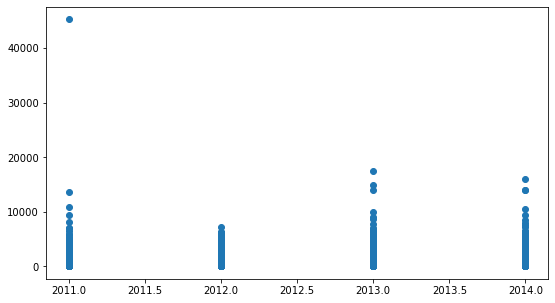

In [81]:
# Scatter plot of total sales per year
fig, ax= plt.subplots(figsize=(9,5))
ax.scatter(x= data['Order Year'], y=data['Actual Price']);
plt.show()

### Here, I noticed Some markets have the same region names such as 'Central' and 'South', which might cause errors when visualizing the regions without respect to their markets

### My attempts to replace then in the new 'eu' and 'us' dataframes worked but it didn't work on the main dataframe

### So that part is on hold for now

In [81]:
eu = data[data['Market'] == 'EU']

In [82]:
eu['Region'].unique()

['North', 'Central', 'South']
Categories (3, object): ['North', 'Central', 'South']

In [83]:
apac = data[data['Market'] == 'APAC']

In [84]:
apac['Region'].unique()

['North Asia', 'Southeast Asia', 'Central Asia', 'Oceania']
Categories (4, object): ['North Asia', 'Southeast Asia', 'Central Asia', 'Oceania']

In [85]:
us = data[data['Market'] == 'US']

In [86]:
us['Region'].unique()

['South', 'West', 'Central', 'East']
Categories (4, object): ['South', 'West', 'Central', 'East']

In [87]:
africa = data[data['Market'] == 'Africa']

In [88]:
emea = data[data['Market'] == 'EMEA']

In [89]:
latam = data[data['Market'] == 'LATAM']

In [90]:
latam['Region'].unique()

['North', 'South', 'Central', 'Caribbean']
Categories (4, object): ['North', 'South', 'Central', 'Caribbean']

In [91]:
data['Region'].unique()

['North', 'South', 'Central', 'Caribbean', 'North Asia', ..., 'West', 'East', 'Africa', 'EMEA', 'Canada']
Length: 13
Categories (13, object): ['North', 'South', 'Central', 'Caribbean', ..., 'East', 'Africa', 'EMEA', 'Canada']

In [145]:
data['Region'].unique()

['North', 'South', 'Central', 'Caribbean', 'North Asia', ..., 'West', 'East', 'Africa', 'EMEA', 'Canada']
Length: 13
Categories (13, object): ['North', 'South', 'Central', 'Caribbean', ..., 'East', 'Africa', 'EMEA', 'Canada']

### Observation

+ Some markets have the same region names such as 'Central' and 'South', which might cause errors when visualizing the regions without respect to their markets
+ Suffices of their specific markets will be added to clear that ambiguity as done with Asia
+ add suffix 'Europe' to 'North', 'Central', 'South'
+ add suffix 'US' to 'West', 'Central', 'East', 'South'
+ add suffix 'LATAM' to 'Central', 'South', 'North'

In [93]:
eu['Region'].replace('North', 'North Europe', inplace=True)
eu['Region'].replace('Central', 'Central Europe', inplace=True)
eu['Region'].replace('South', 'South Europe', inplace=True)

In [94]:
eu['Region']

Row ID
10295      North Europe
10296      North Europe
10297      North Europe
10298      North Europe
10299      North Europe
              ...      
20290      South Europe
20291    Central Europe
20292    Central Europe
20293    Central Europe
20294    Central Europe
Name: Region, Length: 10000, dtype: category
Categories (13, object): ['Africa', 'Canada', 'Caribbean', 'Central Europe', ..., 'Oceania', 'South Europe', 'Southeast Asia', 'West']

In [95]:
eu

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10295,ES-2014-1311038,2014-07-02,2014-11-02,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,EU,North Europe,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",3,0.0,39.60,12.95,High,2014,7,July,123 days,79.20,79.20,26.40
10296,ES-2014-1311038,2014-07-02,2014-11-02,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,EU,North Europe,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",7,0.0,0.00,78.74,High,2014,7,July,123 days,388.92,388.92,55.56
10297,ES-2014-1311038,2014-07-02,2014-11-02,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,EU,North Europe,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",3,0.0,16.11,3.52,High,2014,7,July,123 days,35.19,35.19,11.73
10298,ES-2014-1311038,2014-07-02,2014-11-02,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,EU,North Europe,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",2,0.0,13.20,7.34,High,2014,7,July,123 days,50.94,50.94,25.47
10299,ES-2014-1311038,2014-07-02,2014-11-02,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,EU,North Europe,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",3,0.0,73.71,48.90,High,2014,7,July,123 days,307.44,307.44,102.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20290,ES-2011-3780358,2011-11-15,2011-11-18,First Class,CC-12100,Chad Cunningham,Home Office,Rovigo,Veneto,Italy,EU,South Europe,OFF-BI-10000346,Office Supplies,Binders,"Ibico 3-Hole Punch, Clear",2,0.0,23.88,7.61,Medium,2011,11,November,3 days,59.82,59.82,29.91
20291,ES-2012-5371207,2012-01-24,2012-01-28,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,EU,Central Europe,OFF-BI-10002083,Office Supplies,Binders,"Acco Hole Reinforcements, Economy",1,0.0,0.57,0.51,Medium,2012,1,January,4 days,6.66,6.66,6.66
20292,ES-2012-5371207,2012-01-24,2012-01-28,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,EU,Central Europe,OFF-SU-10003211,Office Supplies,Supplies,"Acme Ruler, Steel",6,0.0,28.98,6.38,Medium,2012,1,January,4 days,96.66,96.66,16.11


In [96]:
data[data['Market'] == 'EU']['Region'].replace('North','North Europe',inplace=True)

In [97]:
data[data['Market'] == 'EU']['Region'].replace('Central','Central Europe',inplace=True)

In [98]:
data[data['Market'] == 'EU']['Region'] = data[data['Market'] == 'EU']['Region'].replace('South','South Europe',inplace=True)

In [99]:
data[data['Market'] == 'EU']['Region']

Row ID
10295      North
10296      North
10297      North
10298      North
10299      North
          ...   
20290      South
20291    Central
20292    Central
20293    Central
20294    Central
Name: Region, Length: 10000, dtype: category
Categories (13, object): ['Africa', 'Canada', 'Caribbean', 'Central', ..., 'Oceania', 'South', 'Southeast Asia', 'West']

In [100]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08,4.36
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16,31.52
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28,96.64
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44,8.86
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60,35.80


In [101]:
data[data['Market'] == 'EU']['Region'] = data[data['Market'] == 'EU']['Region'].replace('North', 'North Europe', inplace=True)

In [102]:
data['Region']

Row ID
1        North
2        South
3        South
4        South
5        South
         ...  
51286     EMEA
51287     EMEA
51288     EMEA
51289     EMEA
51290     EMEA
Name: Region, Length: 51290, dtype: category
Categories (13, object): ['Africa', 'Canada', 'Caribbean', 'Central', ..., 'Oceania', 'South', 'Southeast Asia', 'West']

**Product ID**

In [82]:
len(data['Product ID'].unique())

10292

In [83]:
data['Product ID']

Row ID
1         OFF-LA-10002782
2         FUR-FU-10004015
3         FUR-BO-10002352
4         OFF-BI-10004428
5         OFF-AR-10004594
               ...       
51286    OFF-AVE-10004570
51287    TEC-LOG-10004419
51288    OFF-BOS-10002705
51289    OFF-ENE-10004132
51290    OFF-ACC-10002343
Name: Product ID, Length: 51290, dtype: object

### Observation
 + Refers to the Unique ID for each produch
 + The convention of the product ID mostly seems to be the first three letters of the 'Category' followed by the the first two letters of the 'Sub-Category', followed by a series of digits
 + Some others seem to be the first three letters of the 'Category' followed by the the first three letters of the 'Product Name', followed by a series of digits

In [84]:
data[data['Product ID'] == 'OFF-ACC-10002343']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42309,TU-2013-9240,2013-06-22,2013-06-29,Standard Class,KM-6720,Kunst Miller,Consumer,Afyon,Afyonkarahisar,Turkey,EMEA,EMEA,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",2,0.6,-12.024,2.53,Medium,2013,6,June,7 days,25.296,63.24,31.62
42445,TU-2014-4980,2014-06-25,2014-06-27,Second Class,NS-8640,Noel Staavos,Corporate,Van,Van,Turkey,EMEA,EMEA,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",6,0.6,-36.072,7.24,High,2014,6,June,2 days,75.888,189.72,31.62
43461,NI-2014-2000,2014-06-17,2014-06-22,Standard Class,DH-3675,Duane Huffman,Home Office,Port Harcourt,Rivers,Nigeria,Africa,Africa,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",6,0.7,-55.044,6.58,Medium,2014,6,June,5 days,56.916,189.72,31.62
44668,EG-2014-2800,2014-03-14,2014-03-21,Standard Class,FO-4305,Frank Olsen,Consumer,Al Fayyum,Al Fayyum,Egypt,Africa,Africa,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",2,0.0,25.920,5.11,Medium,2014,3,March,7 days,63.240,63.24,31.62
45340,TU-2012-5730,2012-06-06,2012-07-06,First Class,SS-10875,Sung Shariari,Consumer,Ordu,Ordu,Turkey,EMEA,EMEA,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",1,0.6,-6.012,4.35,High,2012,6,June,30 days,12.648,31.62,31.62
46548,IR-2014-2670,2014-07-16,2014-07-19,First Class,CA-1965,Carol Adams,Corporate,Shiraz,Fars,Iran,EMEA,EMEA,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",2,0.0,25.920,16.04,Medium,2014,7,July,3 days,63.240,63.24,31.62
47374,IR-2012-6980,2012-01-06,2012-06-06,Standard Class,EC-4050,Erin Creighton,Consumer,Zanjan,Zanjan,Iran,EMEA,EMEA,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",1,0.0,12.960,2.53,Medium,2012,1,January,152 days,31.620,31.62,31.62
48028,TZ-2012-5980,2012-11-30,2012-05-12,Second Class,MO-7800,Meg O'Connel,Home Office,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",1,0.0,12.960,2.68,Medium,2012,11,November,-202 days,31.620,31.62,31.62
48679,UP-2012-2810,2012-06-22,2012-06-26,Standard Class,LC-7140,Logan Currie,Consumer,Chernihiv,Chernihiv,Ukraine,EMEA,EMEA,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",1,0.0,12.960,2.35,Medium,2012,6,June,4 days,31.620,31.62,31.62


In [85]:

data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08,4.36
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16,31.52
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28,96.64
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44,8.86
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60,35.80


In [86]:
# descriptive statistics for numerical data
data.describe()

,Quantity,Discount,Profit,Shipping Cost,Order Year,Order Month,Duration,Discounted Price,Actual Price,Unit Price
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.610982,26.375915,2012.777208,7.143420,5 days 01:53:49.120686293,246.490581,292.581209,85.121957
std,2.278766,0.212280,174.340972,57.296804,1.098931,3.394749,97 days 18:30:57.003928097,487.565361,600.615431,136.272759
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000,-322 days +00:00:00,0.444000,0.990000,0.990000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000,4.000000,1 days 00:00:00,30.758625,38.460000,14.190000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000,7.000000,4 days 00:00:00,85.053000,100.920000,35.060000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000,59 days 00:00:00,251.053200,296.340000,103.590000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000,214 days 00:00:00,22638.480000,45276.960000,7546.160000


In [87]:
# descriptive statistics for categorical data
data[['Ship Mode', 'Segment', 'Market', 'Category', 'Sub-Category', 'Order Priority']].describe()

,Ship Mode,Segment,Market,Category,Sub-Category,Order Priority
count,51290,51290,51290,51290,51290,51290
unique,4,3,7,3,17,4
top,Standard Class,Consumer,APAC,Office Supplies,Binders,Medium
freq,30775,26518,11002,31273,6152,29433


### Observation

* There are some losses in the profits column which are causing the average of profits to be heavily influenced
* The mean of the sales compared to the min and max values make me believe there might be some outliers

## Visual EDA

In [ ]:
sns.pairplot(data)
plt.show()

### Distribution plots for Actual Sales

In [89]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08,4.36
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16,31.52
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28,96.64
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44,8.86
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60,35.80


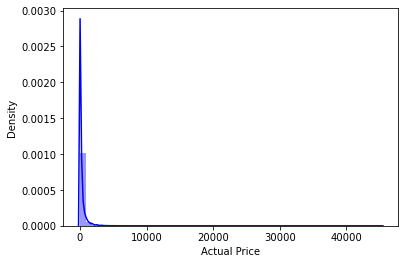

In [90]:
sns.distplot(data['Actual Price'], kde= True, color= 'blue');

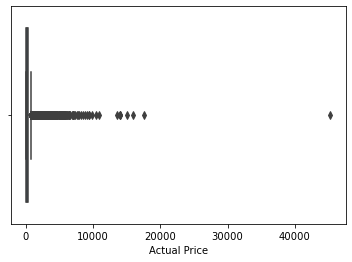

In [91]:
sns.boxplot(x=data['Actual Price']);

### Distribution plot  for Unit Price

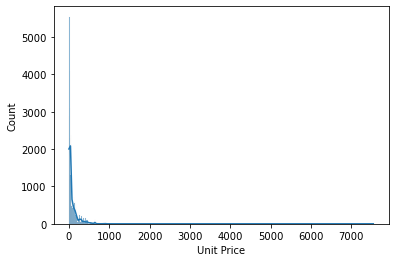

In [92]:
sns.histplot(data['Unit Price'], kde= True)
plt.show()

### Distribution plot  for Discounted Price

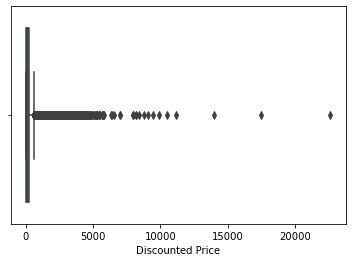

In [93]:
sns.boxplot(x=data['Discounted Price']);

In [94]:
data[data['Discounted Price'] <6000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MX-2014-143658,2014-02-10,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08,4.36
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16,31.52
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28,96.64
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44,8.86
5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60,35.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51286,HU-2012-7730,2012-05-09,2012-07-09,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-AVE-10004570,Office Supplies,Binders,"Avery Binder Covers, Economy",1,0.0,3.42,1.98,High,2012,5,May,61 days,11.07,11.07,11.07
51287,HU-2012-7730,2012-05-09,2012-07-09,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,TEC-LOG-10004419,Technology,Accessories,"Logitech Flash Drive, USB",2,0.0,18.42,13.02,High,2012,5,May,61 days,61.44,61.44,30.72
51288,HU-2012-7730,2012-05-09,2012-07-09,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-BOS-10002705,Office Supplies,Art,"Boston Highlighters, Fluorescent",4,0.0,20.88,8.78,High,2012,5,May,61 days,80.52,80.52,20.13


In [95]:
len(data[data['Discounted Price'] > 6000])

19

In [96]:
len(data[data['Discounted Price'] > 251])

12828

In [97]:
data[data['Discounted Price'] > 20000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,United States,US,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,6,0.5,-1811.0784,24.29,Medium,2011,3,March,5 days,22638.48,45276.96,7546.16


In [98]:
data[data['Discounted Price'] > 10000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33920,CA-2014-127180,2014-10-23,2014-10-25,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,United States,US,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,4,0.2,3919.9888,45.98,High,2014,10,October,2 days,11199.968,13999.96,3499.99
33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,United States,US,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,6,0.5,-1811.0784,24.29,Medium,2011,3,March,5 days,22638.480,45276.96,7546.16
35487,CA-2014-166709,2014-11-18,2014-11-23,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,United States,US,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,3,0.0,5039.9856,363.19,Medium,2014,11,November,5 days,10499.970,10499.97,3499.99
38123,CA-2013-118689,2013-03-10,2013-10-10,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,5,0.0,8399.9760,349.07,Medium,2013,3,March,214 days,17499.950,17499.95,3499.99
39450,CA-2014-140151,2014-03-24,2014-03-26,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,United States,US,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,4,0.0,6719.9808,20.00,Medium,2014,3,March,2 days,13999.960,13999.96,3499.99


In [99]:
data[data['Discounted Price'] > 5000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12051,ES-2011-2257437,2011-10-08,2011-08-17,Standard Class,BP-11155,Becky Pak,Consumer,London,England,United Kingdom,EU,North,TEC-PH-10002759,Technology,Phones,"Cisco Smart Phone, Cordless",9,0.1,1758.8880,454.81,Medium,2011,10,October,-52 days,5276.988,5863.32,651.48
12069,ES-2014-1651774,2014-08-09,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,Italy,EU,South,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",14,0.0,3979.0800,778.32,Low,2014,8,August,36 days,7958.580,7958.58,568.47
12383,ES-2012-5671193,2012-05-29,2012-05-29,Same Day,MG-18145,Mike Gockenbach,Consumer,Luton,England,United Kingdom,EU,North,TEC-PH-10004823,Technology,Phones,"Nokia Smart Phone, Full Size",9,0.0,2461.3200,2.34,Medium,2012,5,May,0 days,5724.540,5724.54,636.06
13528,ES-2013-2860574,2013-02-27,2013-01-03,Second Class,LB-16795,Laurel Beltran,Home Office,Edinburgh,Scotland,United Kingdom,EU,North,OFF-AP-10003590,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",10,0.0,1898.4000,730.91,High,2013,2,February,-55 days,5273.700,5273.70,527.37
13560,ES-2011-3248922,2011-08-09,2011-11-09,Second Class,ER-13855,Elpida Rittenbach,Corporate,Lugo,Galicia,Spain,EU,South,OFF-AP-10002330,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",12,0.0,2476.4400,28.74,Critical,2011,8,August,92 days,6517.080,6517.08,543.09
13879,ES-2014-3785216,2014-11-19,2014-11-23,Standard Class,HG-14845,Harry Greene,Consumer,Lille,Nord-Pas-de-Calais,France,EU,Central,FUR-CH-10002891,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",14,0.1,63.5460,572.95,High,2014,11,November,4 days,5729.346,6365.94,454.71
15359,ES-2013-3939561,2013-01-21,2013-01-24,Second Class,JG-15160,James Galang,Consumer,Stockton-on-Tees,England,United Kingdom,EU,North,FUR-TA-10000184,Furniture,Tables,"Barricks Conference Table, Fully Assembled",6,0.0,2071.4400,432.13,Medium,2013,1,January,3 days,5451.300,5451.30,908.55
16681,ES-2012-5877219,2012-12-13,2012-12-17,Standard Class,GT-14710,Greg Tran,Consumer,Huddersfield,England,United Kingdom,EU,North,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",9,0.0,404.7300,656.73,High,2012,12,December,4 days,5785.020,5785.02,642.78
19688,IT-2013-4602742,2013-04-06,2013-07-06,Second Class,ML-17395,Marina Lichtenstein,Corporate,Valladolid,Castile and León,Spain,EU,South,TEC-PH-10002935,Technology,Phones,"Samsung Smart Phone, VoIP",10,0.1,-445.4400,71.46,Critical,2013,4,April,91 days,5726.160,6362.40,636.24


### Observation

* The max sales was from the technology category, sub-category, Machines and produced a loss

### Distribution plots for Profit

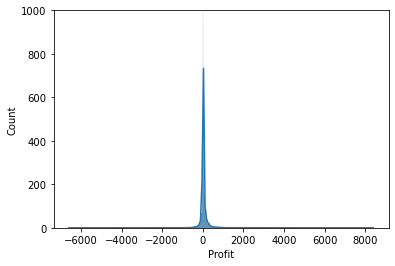

In [100]:
sns.histplot(data['Profit'], kde= True)

#plt.xlim(0, 2000)
plt.ylim(0, 1000)
plt.show()


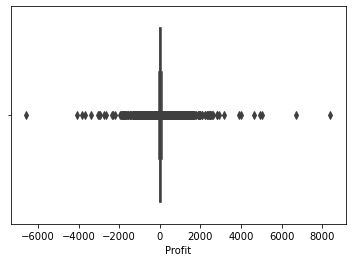

In [101]:
sns.boxplot(x=data['Profit']);

In [102]:
data[data['Profit'] < -2000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10458,IT-2013-3695467,2013-10-06,2013-06-14,Standard Class,SS-20140,Saphhira Shifley,Corporate,Lisbon,Lisboa,Portugal,EU,South,OFF-AP-10001623,Office Supplies,Appliances,"Hoover Stove, White",12,0.5,-3059.8200,286.87,Medium,2013,10,October,-114 days,3399.660,6799.32,566.61
11743,IT-2013-5208514,2013-03-13,2013-03-13,Same Day,VM-21685,Valerie Mitchum,Home Office,Bergen op Zoom,North Brabant,Netherlands,EU,Central,FUR-CH-10001582,Furniture,Chairs,"Office Star Executive Leather Armchair, Black",11,0.5,-2211.1650,520.89,High,2013,3,March,0 days,2570.865,5141.73,467.43
26684,ID-2014-26869,2014-05-23,2014-05-25,Second Class,NC-18340,Nat Carroll,Consumer,Lahore,Punjab,Pakistan,APAC,Central Asia,FUR-TA-10002172,Furniture,Tables,"Hon Conference Table, Rectangular",7,0.8,-2380.3500,101.24,Medium,2014,5,May,2 days,1286.670,6433.35,919.05
29513,ID-2013-12295,2013-09-14,2013-09-14,Same Day,SN-20560,Skye Norling,Home Office,Lahore,Punjab,Pakistan,APAC,Central Asia,TEC-PH-10002991,Technology,Phones,"Apple Smart Phone, Full Size",11,0.5,-3009.4350,333.10,Medium,2013,9,September,0 days,3499.155,6998.31,636.21
31980,US-2014-168116,2014-05-11,2014-05-11,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,United States,US,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,4,0.5,-3839.9904,674.82,High,2014,5,May,0 days,7999.980,15999.96,3999.99
34308,CA-2014-134845,2014-04-18,2014-04-24,Standard Class,SR-20425,Sharelle Roach,Home Office,Louisville,Colorado,United States,US,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,5,0.7,-3399.9800,120.31,Medium,2014,4,April,6 days,2549.985,8499.95,1699.99
34448,CA-2012-147830,2012-12-15,2012-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,Newark,Ohio,United States,US,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,2,0.7,-2639.9912,219.62,High,2012,12,December,3 days,1799.994,5999.98,2999.99
36288,US-2014-122714,2014-08-12,2014-12-14,Standard Class,HG-14965,Henry Goldwyn,Corporate,Chicago,Illinois,United States,US,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,5,0.8,-2929.4845,129.51,Medium,2014,8,August,124 days,1889.990,9449.95,1889.99
36607,CA-2014-131254,2014-11-20,2014-11-22,First Class,NC-18415,Nathan Cano,Consumer,Houston,Texas,United States,US,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,6,0.8,-2287.7820,263.47,High,2014,11,November,2 days,1525.188,7625.94,1270.99


In [103]:
# number of losses
data[data['Profit'] < 0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,US-2013-126655,2013-06-26,2013-01-07,Standard Class,HE-14800,Harold Engle,Corporate,San Miguelito,Panama,Panama,LATAM,Central,OFF-EN-10000761,Office Supplies,Envelopes,"Jiffy Peel and Seal, with clear poly window",2,0.4,-6.600,1.60,Medium,2013,6,June,-170 days,18.840,31.40,15.70
18,US-2013-126655,2013-06-26,2013-01-07,Standard Class,HE-14800,Harold Engle,Corporate,San Miguelito,Panama,Panama,LATAM,Central,FUR-FU-10003066,Furniture,Furnishings,"Deflect-O Frame, Duo Pack",7,0.4,-149.100,27.77,Medium,2013,6,June,-170 days,308.280,513.80,73.40
19,US-2013-126655,2013-06-26,2013-01-07,Standard Class,HE-14800,Harold Engle,Corporate,San Miguelito,Panama,Panama,LATAM,Central,OFF-EN-10000075,Office Supplies,Envelopes,"GlobeWeis Interoffice Envelope, Security-Tint",2,0.4,-6.064,2.14,Medium,2013,6,June,-170 days,40.176,66.96,33.48
20,US-2013-126655,2013-06-26,2013-01-07,Standard Class,HE-14800,Harold Engle,Corporate,San Miguelito,Panama,Panama,LATAM,Central,OFF-EN-10002226,Office Supplies,Envelopes,"Jiffy Clasp Envelope, Recycled",3,0.4,-4.836,0.38,Medium,2013,6,June,-170 days,8.784,14.64,4.88
24,US-2014-119753,2014-03-10,2014-08-10,Standard Class,DW-13195,David Wiener,Corporate,Panama City,Panama,Panama,LATAM,Central,OFF-BI-10003934,Office Supplies,Binders,"Acco Binding Machine, Clear",3,0.4,-20.220,4.00,Medium,2014,3,March,153 days,60.660,101.10,33.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51276,TU-2013-7900,2013-05-28,2013-05-28,Same Day,DB-3210,Dean Braden,Consumer,Ankara,Ankara,Turkey,EMEA,EMEA,TEC-BEL-10001971,Technology,Accessories,"Belkin Flash Drive, USB",1,0.6,-11.400,6.49,Critical,2013,5,May,0 days,16.860,42.15,42.15
51277,TU-2013-7800,2013-09-08,2013-11-08,Second Class,MY-8295,Muhammed Yedwab,Corporate,Adana,Adana,Turkey,EMEA,EMEA,OFF-ELI-10001812,Office Supplies,Supplies,"Elite Shears, Easy Grip",1,0.6,-26.268,0.49,Medium,2013,9,September,61 days,19.452,48.63,48.63
51278,TU-2013-7800,2013-09-08,2013-11-08,Second Class,MY-8295,Muhammed Yedwab,Corporate,Adana,Adana,Turkey,EMEA,EMEA,OFF-ADV-10004598,Office Supplies,Fasteners,"Advantus Paper Clips, Metal",1,0.6,-4.818,0.25,Medium,2013,9,September,61 days,5.352,13.38,13.38


### Distribution plots for Shipping Cost

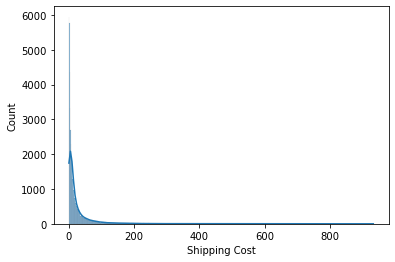

In [104]:
sns.histplot(data['Shipping Cost'], kde= True)

#plt.xlim(0, 2000)
#plt.ylim(0, 1000)
plt.show()

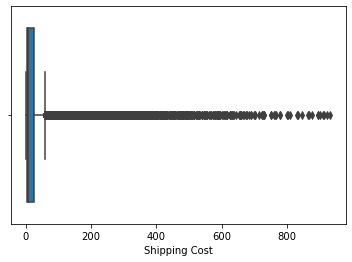

In [105]:
sns.boxplot(x=data['Shipping Cost']);

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 1 to 51290
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Order ID          51290 non-null  object         
 1   Order Date        51290 non-null  datetime64[ns] 
 2   Ship Date         51290 non-null  datetime64[ns] 
 3   Ship Mode         51290 non-null  category       
 4   Customer ID       51290 non-null  object         
 5   Customer Name     51290 non-null  object         
 6   Segment           51290 non-null  category       
 7   City              51290 non-null  object         
 8   State             51290 non-null  object         
 9   Country           51290 non-null  object         
 10  Market            51290 non-null  category       
 11  Region            51290 non-null  category       
 12  Product ID        51290 non-null  object         
 13  Category          51290 non-null  category       
 14  Sub-Ca

**Countplot for Segment**

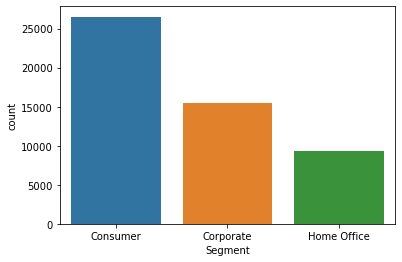

In [107]:
sns.countplot(x= data['Segment']);

**Countplot for Market**

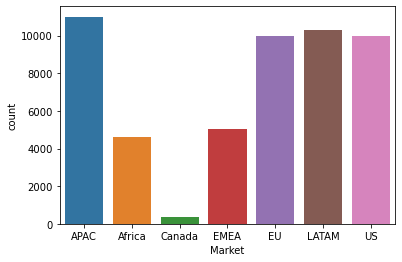

In [108]:
sns.countplot(x= data['Market']);

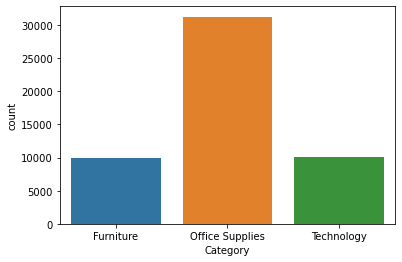

In [109]:
sns.countplot(x= data['Category']);

### Observation
+ Office Supplies have the greatest number of purchases but does that translate into more sales?


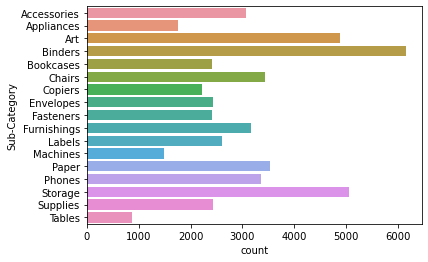

In [111]:
sns.countplot(y= data['Sub-Category']);

In [1]:
sns.countplot(x= data['Order Priority']);

NameError: name 'sns' is not defined

### Relationship of Sales to Profit

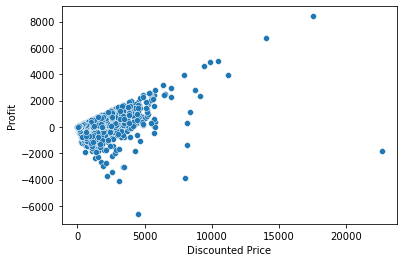

In [114]:
sns.scatterplot(x= 'Discounted Price', y= 'Profit', data= data);

### Observation

* sales have a positive relationship with Profit 
* Sales have a negative relationship with Loss

### Subplots of Discounted Price to Profit for each category

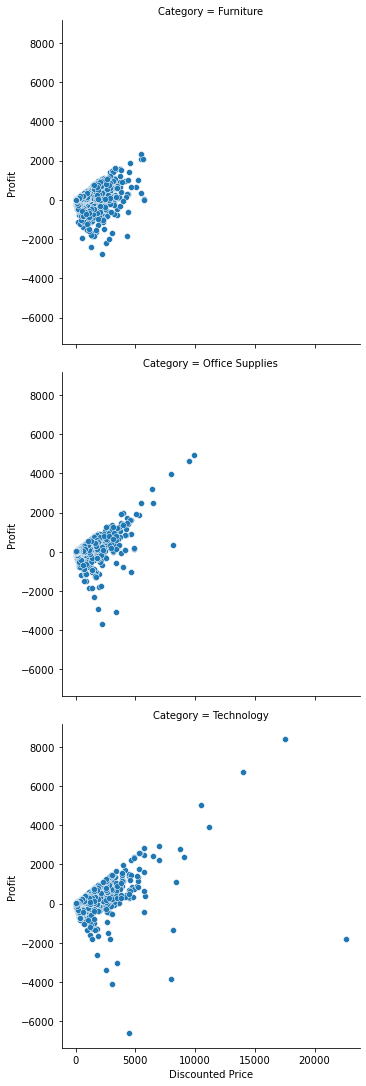

In [115]:

sns.relplot(x= 'Discounted Price', y= 'Profit', data= data, kind= 'scatter', row= 'Category');

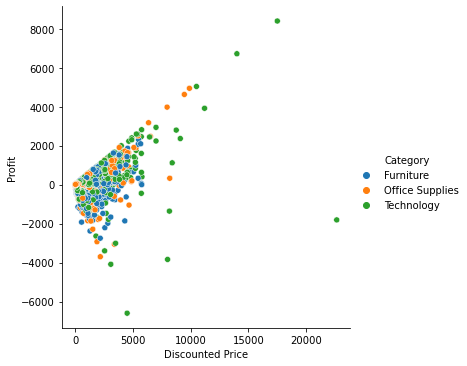

In [116]:
sns.relplot(x='Discounted Price',y = 'Profit',data = data,
            kind = 'scatter',
           hue = 'Category')
plt.show()

### Observation
* The furniture category has it's sale, profits and losses clustered about a point.
* Office supplies are about the same but have a few sales, profits an losses that are wider than most
* The Technology category has more sparsely distributed points outside of the majority clustered

Questions
+ What are the very high profits and sales of Tech as a result of? General amounts of products in such category? Quantities bought?
+ What is the reason for such high losses?

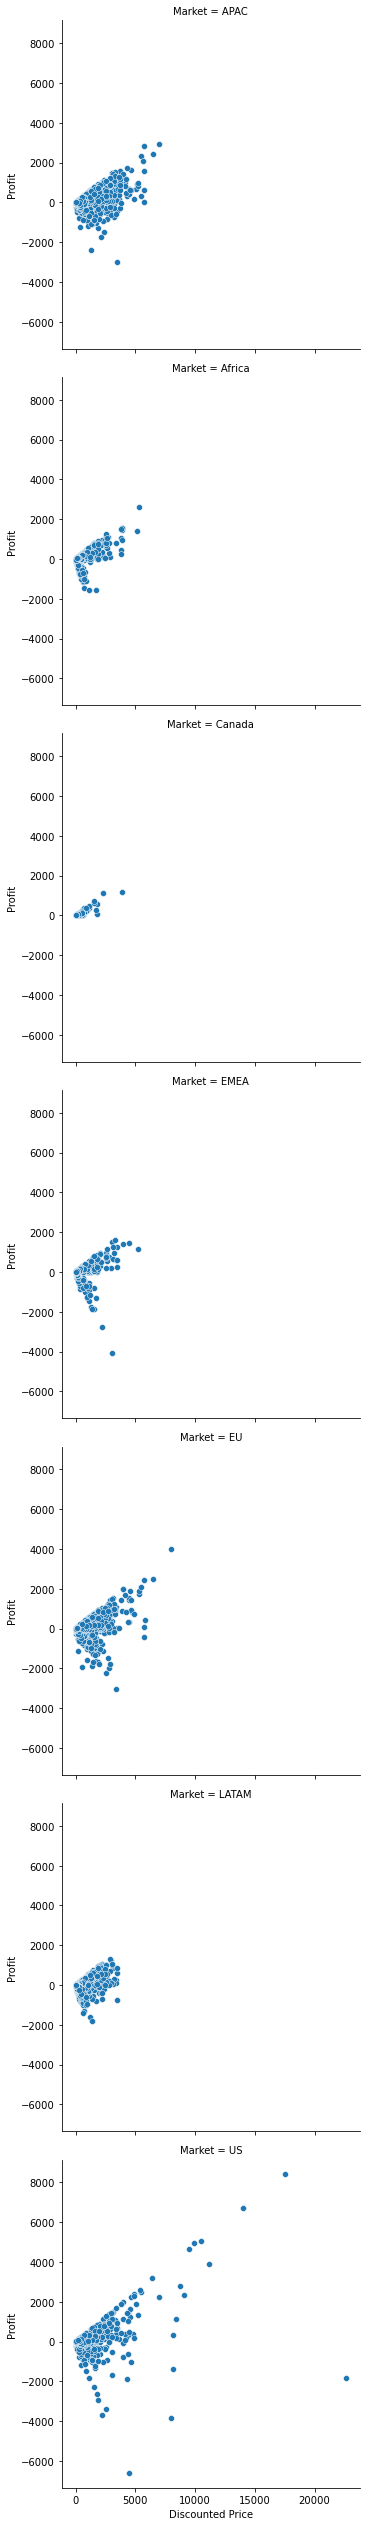

In [117]:
sns.relplot(x= 'Discounted Price', y= 'Profit', data= data, kind= 'scatter', row= 'Market');

### Observation
+ Most Tech purchases are made from the US

### Showing the Point plot (means of Discounted Price  per category)

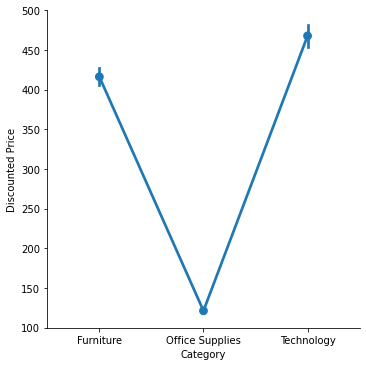

In [118]:
# Create a point plot of sales vs. category
sns.catplot(x="Category",y="Discounted Price",kind='point',data=data)


            
# Show plot
plt.show()

### Showing the Point plot (means of Profit  per category)

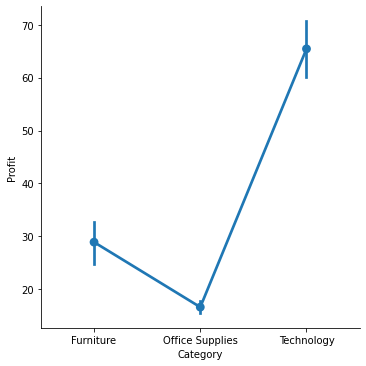

In [119]:
# Create a point plot of family relationship vs. absences
sns.catplot(x="Category",y="Profit",kind='point',data=data)


            
# Show plot
plt.show()

### Analysis

In [120]:
# Creating new DataFrame from existing data with order date as index
data2 = data.set_index('Order Date')

In [121]:
# Printing first 5 rows of  new data
data2.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Order Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-10,MX-2014-143658,2014-06-10,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",3,0.0,4.56,1.03,Medium,2014,2,February,120 days,13.08,13.08,4.36
2012-10-15,MX-2012-155047,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",8,0.0,90.72,13.45,Medium,2012,10,October,5 days,252.16,252.16,31.52
2012-10-15,MX-2012-155047,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",2,0.0,54.08,9.63,Medium,2012,10,October,5 days,193.28,193.28,96.64
2012-10-15,MX-2012-155047,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",4,0.0,4.96,1.37,Medium,2012,10,October,5 days,35.44,35.44,8.86
2012-10-15,MX-2012-155047,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,LATAM,South,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",2,0.0,11.44,3.79,Medium,2012,10,October,5 days,71.60,71.60,35.80


In [122]:
# Sorting values of DataFrame by Order Date
data2.sort_values('Order Date', inplace=True)

In [123]:
# Grouping DataFrame by Order Year and Month with sum of Sales and Profit as values and assigning that to years_month
years_months = data2.groupby(['Order Year', 'Order Month'])[['Discounted Price', 'Profit']].mean()

In [124]:
# Printing first 5 rows of years_month
years_months.head()

Discounted Price       Profit
Order Year Order Month                               
2011       1                138241.30042  13457.23302
           2                134969.94086  17588.83726
           3                171455.59372  16169.36062
           4                128833.47034  13405.46924
           5                148146.72092  14777.45792

In [125]:
# Resetting index by dropping only Order Month from index
years_months.reset_index(level= 'Order Month',inplace= True)

In [126]:
years_months.head()

,Order Month,Discounted Price,Profit
Order Year,,,
2011,1,138241.30042,13457.23302
2011,2,134969.94086,17588.83726
2011,3,171455.59372,16169.36062
2011,4,128833.47034,13405.46924
2011,5,148146.72092,14777.45792


In [127]:
# Assigning all all data with index 2011 to year2011
year2011 = years_months[years_months.index == 2011]

In [128]:
year2011

,Order Month,Discounted Price,Profit
Order Year,,,
2011,1,138241.30042,13457.23302
2011,2,134969.94086,17588.83726
2011,3,171455.59372,16169.36062
2011,4,128833.47034,13405.46924
2011,5,148146.72092,14777.45792
2011,6,189338.43966,25932.87796
2011,7,162034.69756,10631.84406
2011,8,219223.49524,19650.67124
2011,9,255237.89698,32313.25458


In [ ]:
# Line plot of sales after discount per month for 2011
sns.lineplot(x='Order Month Name', y='Discounted Price', data= year2011, estimator=None)

plt.xticks(rotation=45)
plt.show()

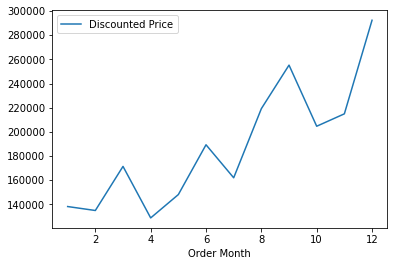

In [129]:
# Line plot of sales after discount per month for 2011
year2011.plot(x='Order Month', y='Discounted Price', kind='line');

#### Observation
+ There was a very small drop in sales in February from January, 
+ sharp increase in March
+ sharp decrease to the lowest point in April (What caused this sharp decrease?)
+ An increase through May to June 
+ Then the famous July decrease (not as steep as the subsequent years though)
+ An increase through August to September 
+ A decrease in October
+ A little increase in November and then a steep increase in December(Christmas?)

In [130]:
# Assigning all all data with index 2012 to year2012
year2012 = years_months[years_months.index == 2012]

In [131]:
year2012

,Order Month,Discounted Price,Profit
Order Year,,,
2012,1,162800.89338,19627.42058
2012,2,152661.15144,17828.18244
2012,3,201608.72784,22752.87684
2012,4,187469.96192,20804.00532
2012,5,218960.16042,22865.39572
2012,6,249289.77172,34358.03962
2012,7,174394.02808,21725.18808
2012,8,271669.66086,36511.44996
2012,9,256567.85308,25039.93498


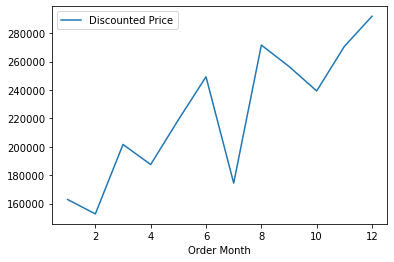

In [132]:
# Line plot of sales after discount per month for 2012
year2012.plot(x='Order Month', y='Discounted Price', kind='line');

#### Observation
+ Very similar trend from January to August 
+ February however had the lowest sales this year
+ Still a rise in March
+ Decrease in April
+ Rise in May through to June
+ Dip in July (Very Steep)
+ Steep inscrease in August
+ A little decrease from September through tho October
+ Increase in November through to December (Christmas?)

In [133]:
# Assigning all all data with index 2013 to year2013
year2013 = years_months[years_months.index == 2013]

In [134]:
year2013

,Order Month,Discounted Price,Profit
Order Year,,,
2013,1,206459.19582,26052.40252
2013,2,191062.77216,31553.99756
2013,3,230547.79468,34873.71938
2013,4,233181.34844,26008.05144
2013,5,304509.96336,39053.30946
2013,6,341162.34370,43298.85000
2013,7,223642.65664,27019.91294
2013,8,323876.60716,32977.75576
2013,9,326897.27044,18850.09084


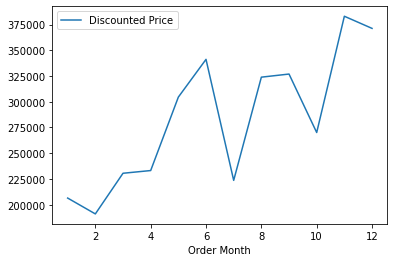

In [135]:
# Line plot of sales after discount per month for 2013
year2013.plot(x='Order Month', y='Discounted Price', kind='line');

#### Observation
+ There was a very small drop in sales in February (lowest sale of the year) from January, 
+ sharp increase in March
+ A little increase in April
+ A steep increase to May and then a small one to June 
+ Then the famous July steep decrease (like the previous year, if not worse)
+ A steep increase to August then a little one to September 
+ A decrease in October
+ A steep increase in November and then a tiny decrease in December(What's causing the litte decrease in December now? Maybe just an random decrease. Might return to the most sales of the next year)

In [136]:
# Assigning all all data with index 2014 to year2014
year2014 = years_months[years_months.index == 2014]

In [137]:
year2014

,Order Month,Discounted Price,Profit
Order Year,,,
2014,1,268265.52240,31447.74660
2014,2,244159.30486,29454.01876
2014,3,347720.96868,50097.04458
2014,4,302132.54000,35709.53320
2014,5,304798.83604,34335.60404
2014,6,372577.23298,40869.02108
2014,7,278672.17326,26450.70856
2014,8,432731.04194,46443.47934
2014,9,405436.70584,52533.83284


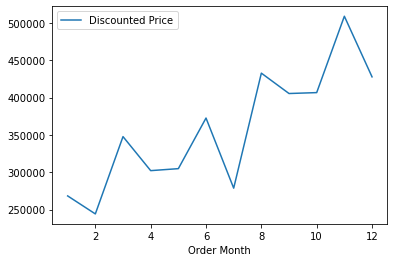

In [138]:
# Line plot of sales after discount per month for 2014
year2014.plot(x='Order Month', y='Discounted Price', kind='line');

#### Observation
+ There was a small drop in sales in February (lowest sale of the year) from January, 
+ sharp increase in March
+ A decrease in April
+ A tiny increase to May and then a steeper one to June 
+ Then the famous July steep decrease 
+ A steep increase to August
+ then a little decrease to September 
+ Similar sales in October
+ A steep increase in November and then a steeper decrease in December(Far steeper than last year) What's causing the current trend of decrease in December now? )

#### Observation
+ When the year starts, there is ALWAYS a decrease in February
+ ALWAYS a steep increase in March
+ ALWAYS a decrease in April EXCEPT in 2013 when there was a very small increase
+ ALWAYS an increase in May and June
+ There is ALWAYS a steep dip in sales in July
+ ALWAYS a steep increase in August
+ ALWAYS a decrease in September except in 2013 when there was only a slight increase
+ ALWAYS a steep decrease in October except in 2014 when there was only a slight increase (almost negligible)
+ ALWAYS an increase in November
+ A good increase in the first two years in december and decreases in the last two years

### What is the cause of the decrease in February and increase in March every year?
### Most high sales are from the technology category and US

In [139]:
year2011

,Order Month,Discounted Price,Profit
Order Year,,,
2011,1,138241.30042,13457.23302
2011,2,134969.94086,17588.83726
2011,3,171455.59372,16169.36062
2011,4,128833.47034,13405.46924
2011,5,148146.72092,14777.45792
2011,6,189338.43966,25932.87796
2011,7,162034.69756,10631.84406
2011,8,219223.49524,19650.67124
2011,9,255237.89698,32313.25458


In [140]:
years_months

,Order Month,Discounted Price,Profit
Order Year,,,
2011,1,138241.30042,13457.23302
2011,2,134969.94086,17588.83726
2011,3,171455.59372,16169.36062
2011,4,128833.47034,13405.46924
2011,5,148146.72092,14777.45792
2011,6,189338.43966,25932.87796
2011,7,162034.69756,10631.84406
2011,8,219223.49524,19650.67124
2011,9,255237.89698,32313.25458


In [141]:
years_and_months = data2.groupby(['Order Year', 'Order Month'])[['Discounted Price']]

**2011**

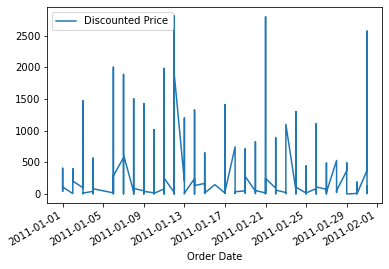

In [142]:
years_and_months.get_group((2011,1)).plot(kind='line');

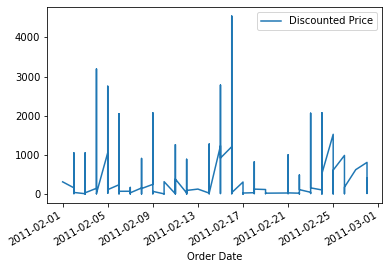

In [143]:
years_and_months.get_group((2011,2)).plot(kind='line');

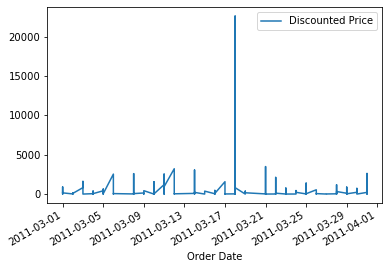

In [144]:
years_and_months.get_group((2011,3)).plot(kind='line');

In [145]:
data[(data['Discounted Price'] > 20000)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,United States,US,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,6,0.5,-1811.0784,24.29,Medium,2011,3,March,5 days,22638.48,45276.96,7546.16


6 Machines from US

Sale - 22638

Loss - 1811

Category - Tech

Discount - 0.5

**2012**

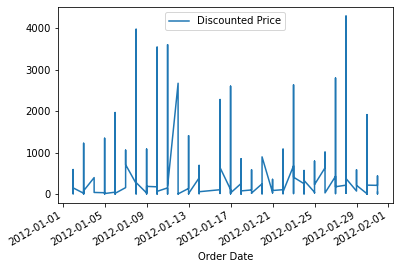

In [146]:
years_and_months.get_group((2012,1)).plot(kind='line');

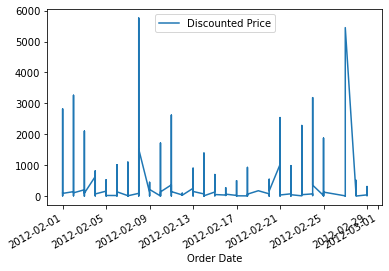

In [147]:
years_and_months.get_group((2012,2)).plot(kind='line');

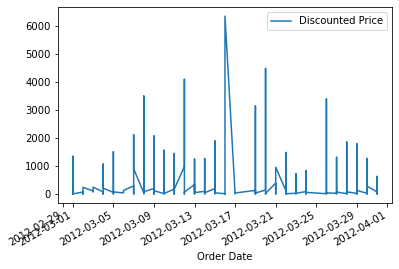

In [148]:
years_and_months.get_group((2012,3)).plot(kind='line');

In [149]:
data[(data['Discounted Price'] > 6300) & (data['Discounted Price'] < 6400)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31806,CA-2012-145352,2012-03-16,2012-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,Atlanta,Georgia,United States,US,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,5,0.0,3177.475,581.12,Medium,2012,3,March,6 days,6354.95,6354.95,1270.99


5 binders from US 

Sale - 6354

Profit - 3177

Category - Office Supplies

Discount - 0

**2013**

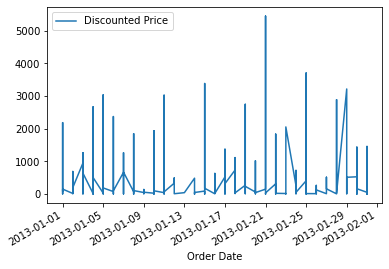

In [150]:
years_and_months.get_group((2013,1)).plot(kind='line');

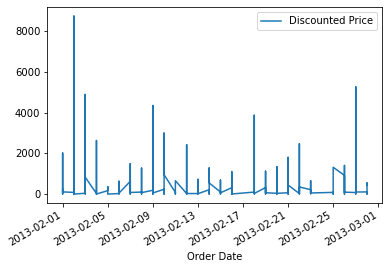

In [151]:
years_and_months.get_group((2013,2)).plot(kind='line');

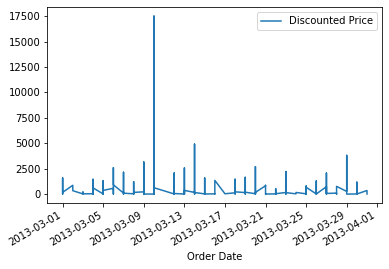

In [152]:
years_and_months.get_group((2013,3)).plot(kind='line');

In [153]:
data[(data['Discounted Price'] > 17000) & (data['Discounted Price'] < 17500)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38123,CA-2013-118689,2013-03-10,2013-10-10,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,5,0.0,8399.976,349.07,Medium,2013,3,March,214 days,17499.95,17499.95,3499.99


5 copiers from US

Sale - 17499

Profit - 8399

Category - Tech

Discount - 0

**2014**

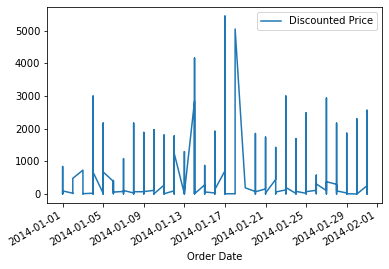

In [154]:
years_and_months.get_group((2014,1)).plot(kind='line');

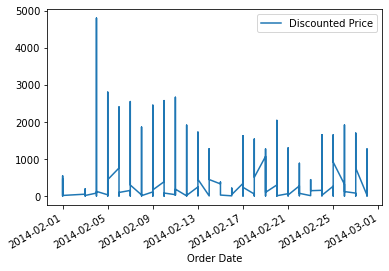

In [155]:
years_and_months.get_group((2014,2)).plot(kind='line');

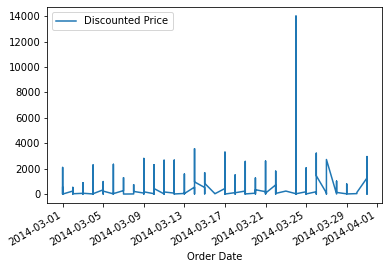

In [156]:
years_and_months.get_group((2014,3)).plot(kind='line');

In [157]:
data[(data['Discounted Price'] > 13500) & (data['Discounted Price'] < 14000)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39450,CA-2014-140151,2014-03-24,2014-03-26,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,United States,US,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,4,0.0,6719.9808,20.0,Medium,2014,3,March,2 days,13999.96,13999.96,3499.99


4 copiers from US

Sale - 13999

Profit - 6719

Category - Tech

Discount - 0

### Observation
+ Looks like in March, product under the tech 

Which category has the highest share of (active) apps in the market?
Is any specific category dominating the market?
Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

**Best and Worst performing months**

In [158]:
data2.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Order Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,IN-2011-47883,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,2011,1,January,212 days,120.366,133.74,44.58
2011-01-01,AG-2011-2040,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,2011,1,January,151 days,408.300,408.30,204.15
2011-01-01,IT-2011-3647632,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",3,0.5,-26.055,4.82,High,2011,1,January,120 days,44.865,89.73,29.91
2011-01-01,HU-2011-1220,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",4,0.0,29.640,8.17,High,2011,1,January,120 days,66.120,66.12,16.53
2011-01-01,IN-2011-47883,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",2,0.1,15.342,1.80,Medium,2011,1,January,212 days,55.242,61.38,30.69


In [159]:
months = data2.groupby('Order Month Name')['Discounted Price', 'Profit', 'Discount'].mean()

In [160]:
months.head(12)

,Discounted Price,Profit,Discount
Order Month Name,,,
April,8.516173e+05,95927.05920,506.756
August,1.247501e+06,135583.35630,676.784
December,1.383335e+06,161550.20268,818.692
February,7.228532e+05,96425.03602,412.118
January,7.757669e+05,90584.80272,445.666
July,8.387436e+05,85827.65364,512.840
June,1.152368e+06,144458.78866,691.576
March,9.513331e+05,123893.00142,541.084
May,9.764157e+05,111031.76714,556.782


In [161]:
months.sort_values('Discounted Price', ascending=False)

,Discounted Price,Profit,Discount
Order Month Name,,,
December,1.383335e+06,161550.20268,818.692
November,1.377651e+06,154704.62196,804.580
August,1.247501e+06,135583.35630,676.784
September,1.244140e+06,128737.11324,736.174
June,1.152368e+06,144458.78866,691.576
October,1.120777e+06,138733.88830,626.676
May,9.764157e+05,111031.76714,556.782
March,9.513331e+05,123893.00142,541.084
April,8.516173e+05,95927.05920,506.756


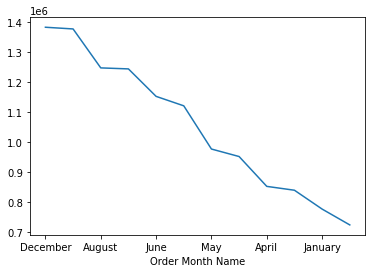

In [162]:
data2.groupby('Order Month Name')['Discounted Price'].sum().sort_values(ascending=False).plot(kind= 'line');

In [163]:
months.sort_values('Profit', ascending=False)

,Discounted Price,Profit,Discount
Order Month Name,,,
December,1.383335e+06,161550.20268,818.692
November,1.377651e+06,154704.62196,804.580
June,1.152368e+06,144458.78866,691.576
October,1.120777e+06,138733.88830,626.676
August,1.247501e+06,135583.35630,676.784
September,1.244140e+06,128737.11324,736.174
March,9.513331e+05,123893.00142,541.084
May,9.764157e+05,111031.76714,556.782
February,7.228532e+05,96425.03602,412.118


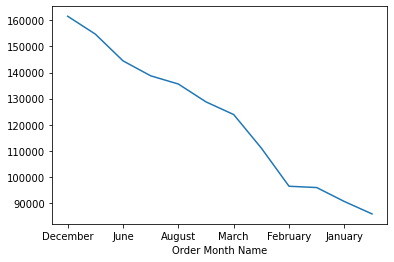

In [164]:
data2.groupby('Order Month Name')['Profit'].sum().sort_values(ascending=False).plot(kind= 'line');

In [165]:
months.sort_values('Discount', ascending=False)

,Discounted Price,Profit,Discount
Order Month Name,,,
December,1.383335e+06,161550.20268,818.692
November,1.377651e+06,154704.62196,804.580
September,1.244140e+06,128737.11324,736.174
June,1.152368e+06,144458.78866,691.576
August,1.247501e+06,135583.35630,676.784
October,1.120777e+06,138733.88830,626.676
May,9.764157e+05,111031.76714,556.782
March,9.513331e+05,123893.00142,541.084
July,8.387436e+05,85827.65364,512.840


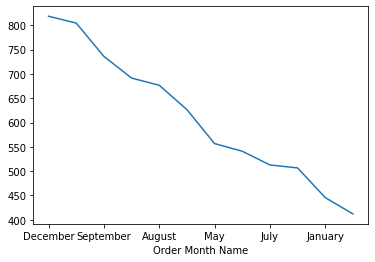

In [166]:
data2.groupby('Order Month Name')['Discount'].sum().sort_values(ascending=False).plot(kind= 'line');

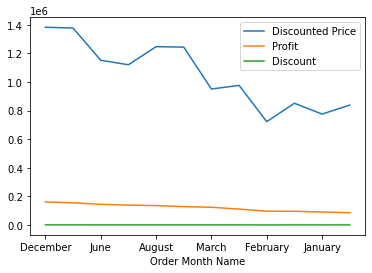

In [167]:
months.sort_values('Profit', ascending=False).plot(kind='line');

In [168]:
dec = data2[data2['Order Month Name'] == 'December']

In [169]:
dec.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Duration,Discounted Price,Actual Price,Unit Price
Order Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-01,MX-2011-141530,2011-01-17,Standard Class,TS-21205,Thomas Seio,Corporate,Torreón,Coahuila,Mexico,LATAM,North,TEC-AC-10004743,Technology,Accessories,"Logitech Router, USB",3,0.0,178.200,54.55,Medium,2011,12,December,-318 days,495.060,495.06,165.02
2011-12-01,NI-2011-1670,2011-01-16,Standard Class,SC-10440,Shaun Chance,Corporate,Lagos,Lagos,Nigeria,Africa,Africa,OFF-KLE-10001317,Office Supplies,Supplies,"Kleencut Ruler, Easy Grip",1,0.7,-10.326,0.43,Medium,2011,12,December,-319 days,4.554,15.18,15.18
2011-12-01,ES-2011-4976144,2011-01-17,Standard Class,AG-10765,Anthony Garverick,Home Office,Leicester,England,United Kingdom,EU,North,FUR-CH-10000745,Furniture,Chairs,"Hon Chairmat, Adjustable",5,0.0,69.600,18.63,Medium,2011,12,December,-318 days,290.100,290.10,58.02
2011-12-01,ES-2011-5040255,2011-01-15,First Class,PB-19105,Peter Bühler,Consumer,Sheffield,England,United Kingdom,EU,North,OFF-PA-10000450,Office Supplies,Paper,"Green Bar Note Cards, Multicolor",2,0.5,-6.150,7.31,Medium,2011,12,December,-320 days,33.930,67.86,33.93
2011-12-01,NI-2011-1670,2011-01-16,Standard Class,SC-10440,Shaun Chance,Corporate,Lagos,Lagos,Nigeria,Africa,Africa,OFF-BIC-10000582,Office Supplies,Art,"BIC Sketch Pad, Water Color",1,0.7,-28.518,1.27,Medium,2011,12,December,-319 days,15.552,51.84,51.84


In [218]:
months2 = data2.groupby('Order Month Name')['Customer Name','Segment', 'Market', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Discounted Price', 'Unit Price']

In [219]:
dec = months2.get_group('December')

In [220]:
dec.head()

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Order Date,,,,,,,,,,,
2011-12-01,Thomas Seio,Corporate,LATAM,Technology,Accessories,3,0.0,178.200,2011,495.060,165.02
2011-12-01,Shaun Chance,Corporate,Africa,Office Supplies,Supplies,1,0.7,-10.326,2011,4.554,15.18
2011-12-01,Anthony Garverick,Home Office,EU,Furniture,Chairs,5,0.0,69.600,2011,290.100,58.02
2011-12-01,Peter Bühler,Consumer,EU,Office Supplies,Paper,2,0.5,-6.150,2011,33.930,33.93
2011-12-01,Shaun Chance,Corporate,Africa,Office Supplies,Art,1,0.7,-28.518,2011,15.552,51.84


In [221]:
dec[['Category', 'Segment', 'Market', 'Sub-Category']].describe()

,Category,Segment,Market,Sub-Category
count,5534,5534,5534,5534
unique,3,3,7,17
top,Office Supplies,Consumer,EU,Binders
freq,3329,2921,1171,646


In [222]:
dec.describe()

,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,3.497832,0.147939,29.192303,2012.713950,249.970204,86.306138
std,2.337642,0.215831,178.433326,1.130248,485.251402,130.043342
min,1.000000,0.000000,-2639.991200,2011.000000,1.161000,0.990000
25%,2.000000,0.000000,0.000000,2012.000000,30.483000,14.065000
50%,3.000000,0.000000,9.045000,2013.000000,87.045000,36.445000
75%,5.000000,0.200000,36.277650,2014.000000,248.565000,108.990000
max,14.000000,0.800000,4946.370000,2014.000000,9892.740000,2999.990000


In [223]:
feb = months2.get_group('February')

In [224]:
feb.head()

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Order Date,,,,,,,,,,,
2011-02-01,Magdelene Morse,Consumer,Canada,Technology,Machines,1,0.00,3.1200,2011,314.2200,314.22
2011-02-02,Jill Matthias,Consumer,EU,Technology,Phones,2,0.10,43.0140,2011,161.5140,89.73
2011-02-02,Duane Noonan,Consumer,APAC,Furniture,Furnishings,2,0.10,7.9200,2011,34.0200,18.90
2011-02-02,Bradley Drucker,Consumer,US,Technology,Accessories,6,0.00,206.3160,2011,468.9000,78.15
2011-02-02,Giulietta Dortch,Corporate,APAC,Furniture,Chairs,1,0.27,-109.9365,2011,334.3035,457.95


In [225]:
dec.describe()

,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,3.497832,0.147939,29.192303,2012.713950,249.970204,86.306138
std,2.337642,0.215831,178.433326,1.130248,485.251402,130.043342
min,1.000000,0.000000,-2639.991200,2011.000000,1.161000,0.990000
25%,2.000000,0.000000,0.000000,2012.000000,30.483000,14.065000
50%,3.000000,0.000000,9.045000,2013.000000,87.045000,36.445000
75%,5.000000,0.200000,36.277650,2014.000000,248.565000,108.990000
max,14.000000,0.800000,4946.370000,2014.000000,9892.740000,2999.990000


In [226]:
feb.describe()

,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,3.394260,0.140799,32.943299,2012.769388,246.960427,88.942128
std,2.330151,0.213889,160.932458,1.112186,480.049129,141.962538
min,1.000000,0.000000,-1235.052000,2011.000000,1.080000,1.390000
25%,2.000000,0.000000,0.000000,2012.000000,30.687000,14.955000
50%,3.000000,0.000000,9.450000,2013.000000,86.305200,35.850000
75%,5.000000,0.200000,36.960000,2014.000000,257.751000,111.950000
max,14.000000,0.800000,2799.984000,2014.000000,8749.950000,2999.990000


In [227]:
dec.head()

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Order Date,,,,,,,,,,,
2011-12-01,Thomas Seio,Corporate,LATAM,Technology,Accessories,3,0.0,178.200,2011,495.060,165.02
2011-12-01,Shaun Chance,Corporate,Africa,Office Supplies,Supplies,1,0.7,-10.326,2011,4.554,15.18
2011-12-01,Anthony Garverick,Home Office,EU,Furniture,Chairs,5,0.0,69.600,2011,290.100,58.02
2011-12-01,Peter Bühler,Consumer,EU,Office Supplies,Paper,2,0.5,-6.150,2011,33.930,33.93
2011-12-01,Shaun Chance,Corporate,Africa,Office Supplies,Art,1,0.7,-28.518,2011,15.552,51.84


### Visualizations comparing December and February

(0.0, 600000.0)

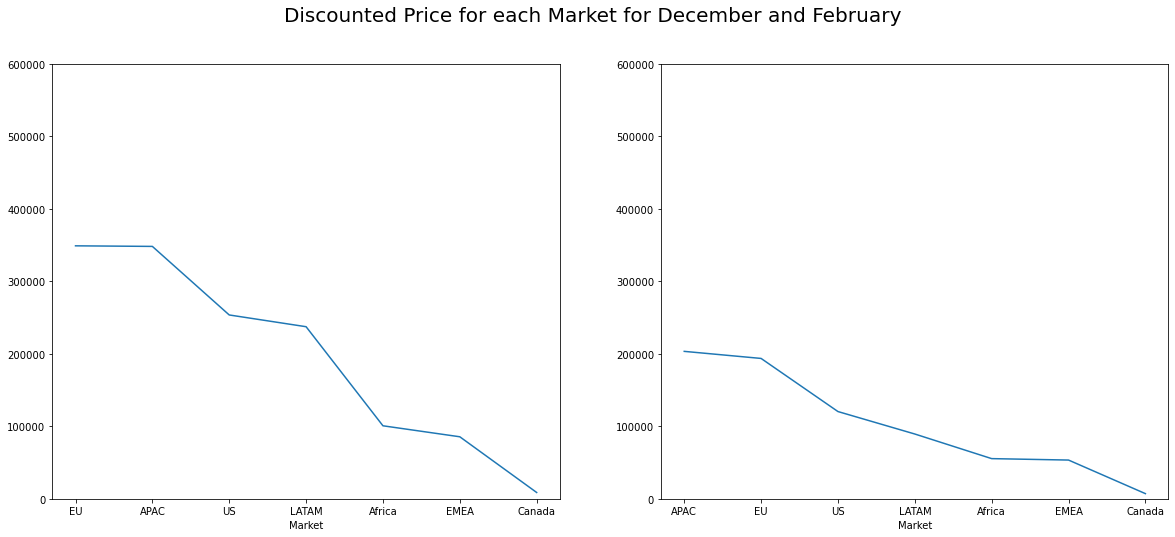

In [266]:
plt.figure(figsize=[20,8])

plt.suptitle('Discounted Price for each Market for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
dec.groupby('Market')['Discounted Price'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,600000)

plt.subplot(1,2,2)
feb.groupby('Market')['Discounted Price'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,600000)

(0.0, 60000.0)

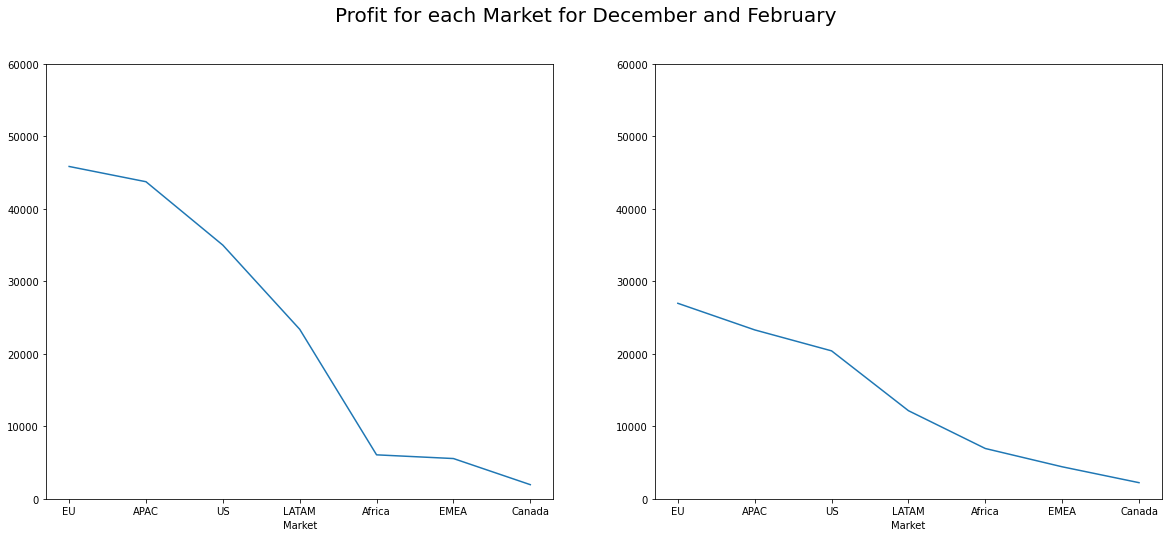

In [228]:
plt.figure(figsize=[20,8])

plt.suptitle('Profit for each Market for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
dec.groupby('Market')['Profit'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,60000)

plt.subplot(1,2,2)
feb.groupby('Market')['Profit'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,60000)

(200000.0, 600000.0)

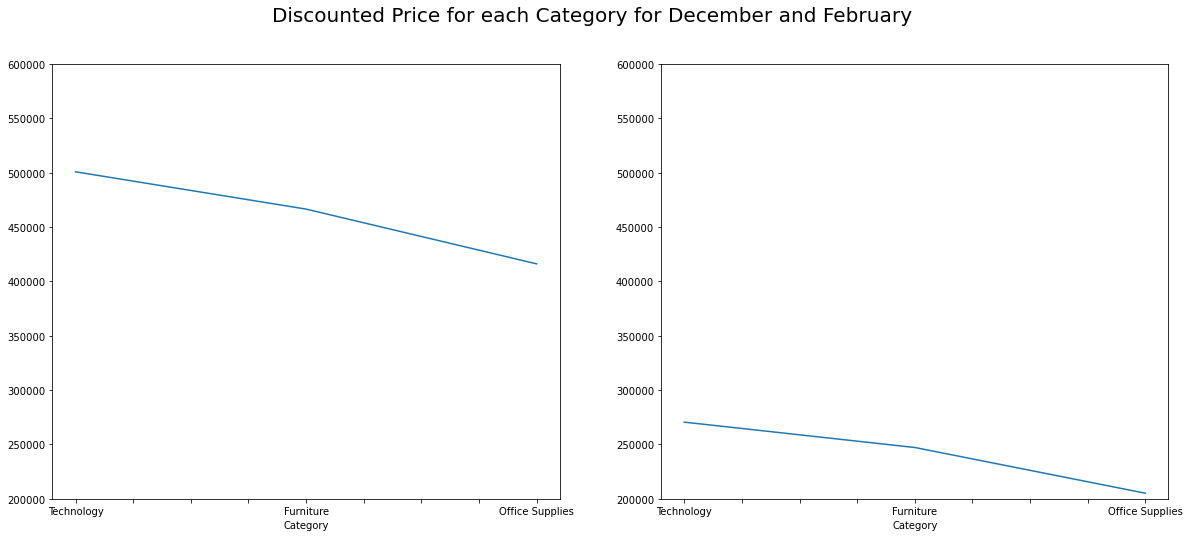

In [281]:
plt.figure(figsize=[20,8])

plt.suptitle('Discounted Price for each Category for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
dec.groupby('Category')['Discounted Price'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(200000,600000)

plt.subplot(1,2,2)
feb.groupby('Category')['Discounted Price'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(200000,600000)

(20000.0, 80000.0)

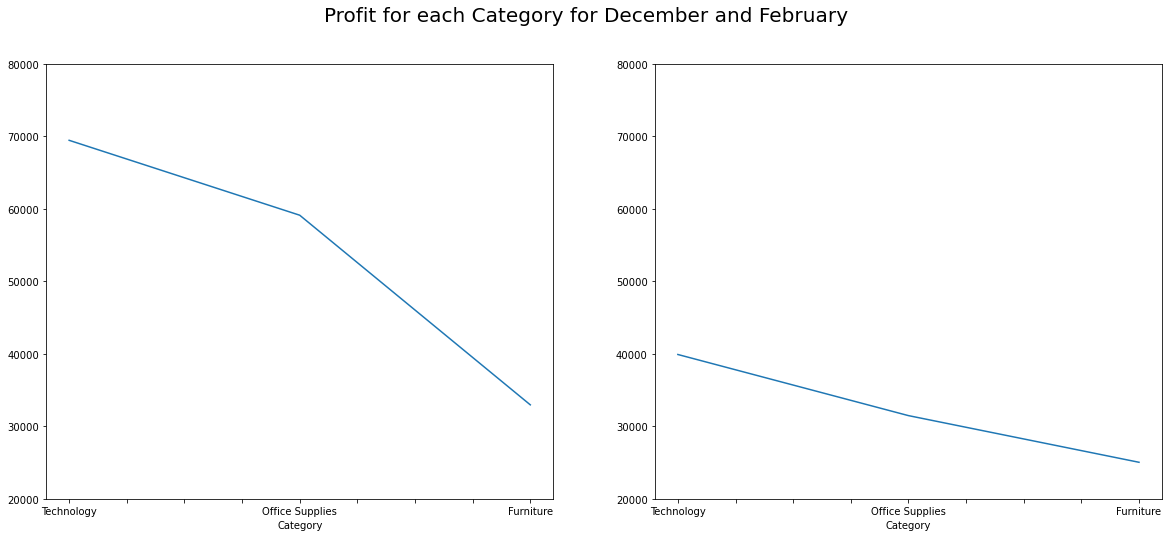

In [282]:
plt.figure(figsize=[20,8])

plt.suptitle('Profit for each Category for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
dec.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(20000,80000)

plt.subplot(1,2,2)
feb.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(20000,80000)

+ Furniture has quite some good sales and even greater quantity but bad profits ocmpared to the others

(2000.0, 12000.0)

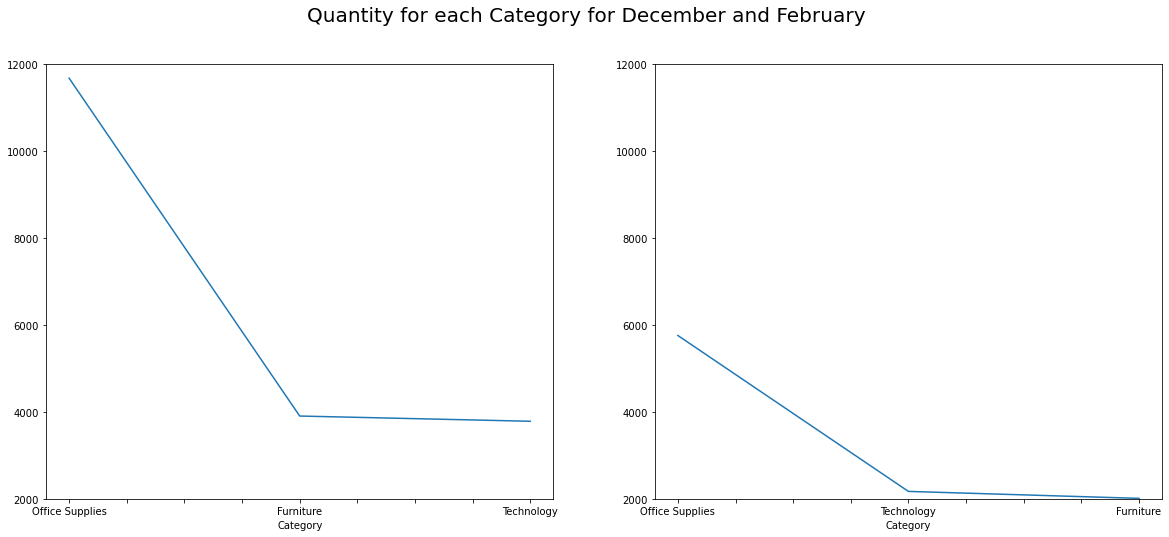

In [230]:
plt.figure(figsize=[20,8])

plt.suptitle('Quantity for each Category for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
dec.groupby('Category')['Quantity'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(2000,12000)

plt.subplot(1,2,2)
feb.groupby('Category')['Quantity'].sum().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(2000,12000)

(0.0, 1200.0)

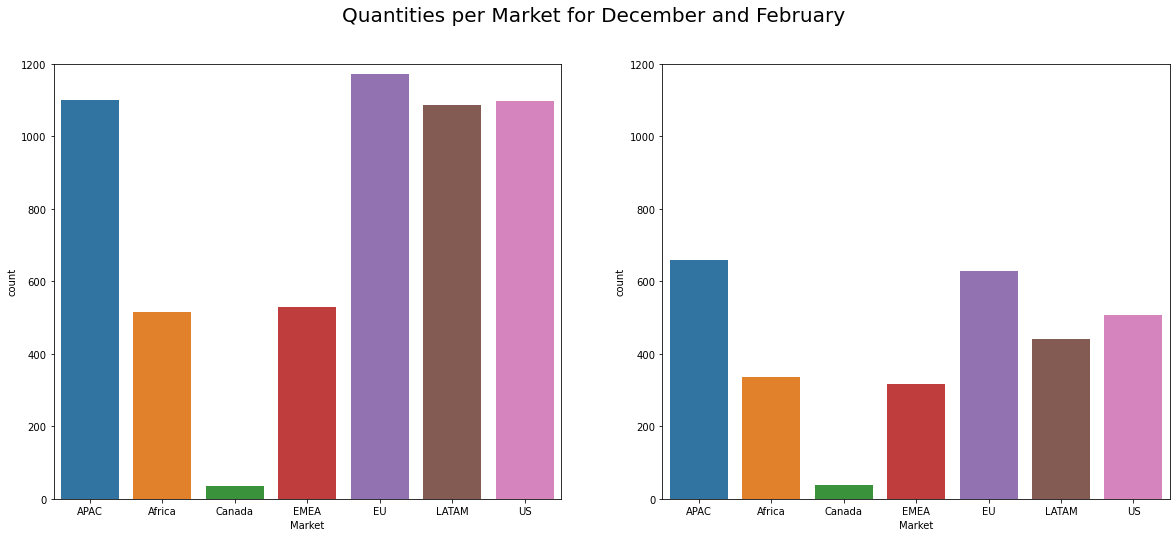

In [232]:
plt.figure(figsize=[20,8])

plt.suptitle('Quantities per Market for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
sns.countplot(x= dec['Market']);
plt.ylim(0,1200)

plt.subplot(1,2,2)
sns.countplot(x= feb['Market']);
plt.ylim(0,1200)

(0.0, 4000.0)

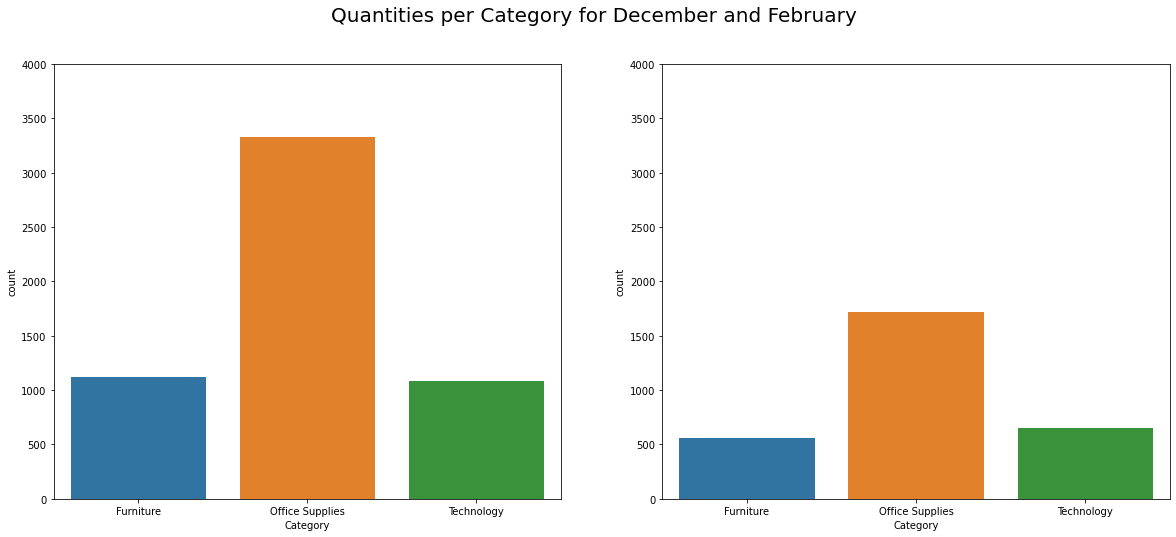

In [233]:
plt.figure(figsize=[20,8])

plt.suptitle('Quantities per Category for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
sns.countplot(x= dec['Category']);
plt.ylim(0,4000)

plt.subplot(1,2,2)
sns.countplot(x= feb['Category']);
plt.ylim(0,4000)

(0.0, 800.0)

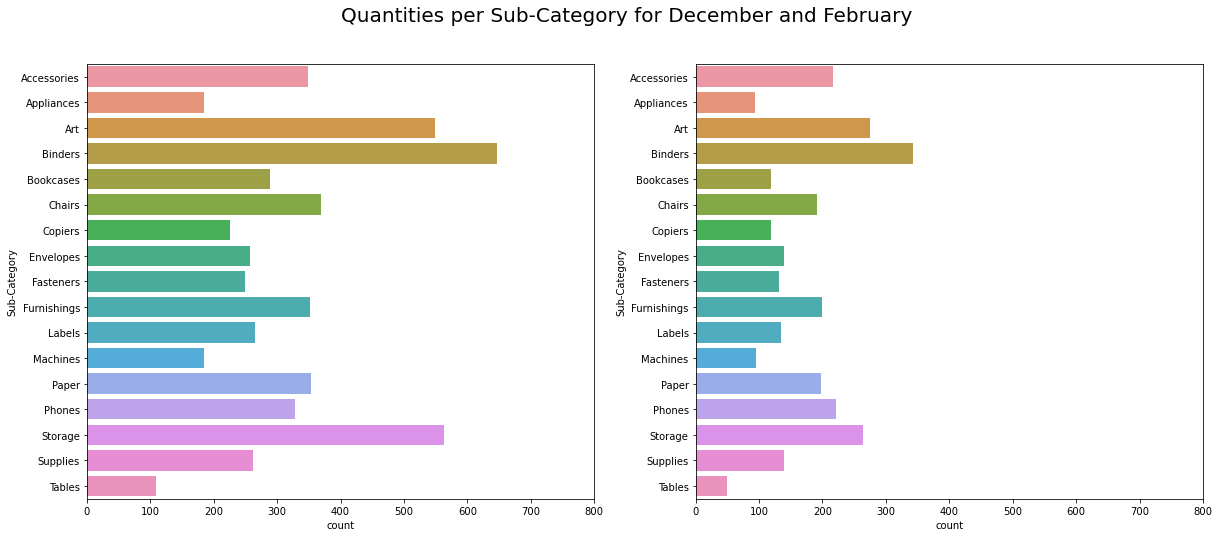

In [234]:
plt.figure(figsize=[20,8])

plt.suptitle('Quantities per Sub-Category for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
sns.countplot(y= dec['Sub-Category']);
plt.xlim(0,800)

plt.subplot(1,2,2)
sns.countplot(y= feb['Sub-Category']);
plt.xlim(0,800)

(0.0, 3000.0)

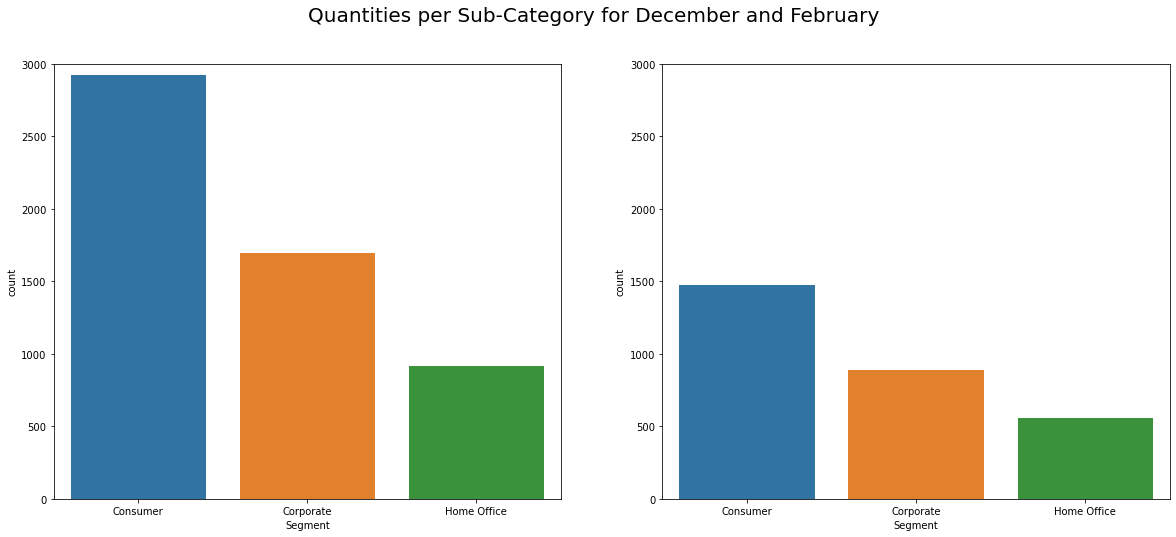

In [235]:
plt.figure(figsize=[20,8])

plt.suptitle('Quantities per Segment for December and February', size=20)

#line plot for profits
plt.subplot(1,2,1)
sns.countplot(x= dec['Segment']);
plt.ylim(0,3000)

plt.subplot(1,2,2)
sns.countplot(x= feb['Segment']);
plt.ylim(0,3000)

In [239]:
dec['Customer Name'].describe()

count              5534
unique              772
top       Henry Goldwyn
freq                 24
Name: Customer Name, dtype: object

In [240]:
feb['Customer Name'].describe()

count               2927
unique               681
top       Phillip Breyer
freq                  20
Name: Customer Name, dtype: object

In [259]:
counts = dict()
for i in dec['Customer Name']:
    if i in counts:
        counts[i] += 1
    else:
        counts[i] = 1
        
print(counts)

#print(counts[i]>10)

Maya Herman 9
{'Thomas Seio': 3, 'Shaun Chance': 7, 'Anthony Garverick': 4, 'Peter Bühler': 3, 'Roy Phan': 8, 'Seth Vernon': 7, 'Eric Murdock': 16, 'Guy Armstrong': 21, 'Michael Granlund': 10, 'Natalie Fritzler': 21, 'Carlos Daly': 18, 'Sheri Gordon': 3, 'Rick Reed': 20, 'Tom Zandusky': 10, 'Heather Kirkland': 3, 'Becky Castell': 12, 'Stewart Visinsky': 2, 'Kean Nguyen': 12, 'Brian Derr': 16, 'Carol Adams': 6, 'Edward Hooks': 18, 'Jason Fortune-': 4, 'Cathy Hwang': 9, 'Alice McCarthy': 6, 'David Philippe': 8, 'Mike Pelletier': 7, 'Lela Donovan': 10, 'Barry Pond': 5, 'Phillip Breyer': 20, 'Craig Molinari': 5, 'Chuck Sachs': 14, 'Sanjit Chand': 6, 'Yoseph Carroll': 13, 'Karen Bern': 9, 'Hunter Lopez': 6, 'Kean Thornton': 7, 'Jonathan Howell': 14, 'Maribeth Schnelling': 10, 'Sarah Foster': 8, 'Victor Preis': 3, 'Lori Olson': 18, 'Tracy Hopkins': 7, 'John Stevenson': 6, 'Sean Wendt': 5, 'Paul Van Hugh': 15, 'Alyssa Crouse': 7, 'Frank Olsen': 15, 'Neoma Murray': 15, 'Liz Pelletier': 10, 'Ai

### Observation
**Sales after Discount**
* The best performing month with regards to Sales is December 
* The least performing month with regards to Sales is February 

There's a steady decrease in sales from December through the various months till February. Most higher sales are in the second half of the year and the lower sales, in the first half.

**Profit**
* The best performing month with regards to Profit is December 
* The least performing month with regards to Profit is July 

Although July had slightly better sales, it fell really short when it came to churning out profits

**Discount**
* The best performing month with regards to Discount is December 
* The least performing month with regards to Discount is February 

There's a steady decrease in sales from December through the various months till February. Most higher sales are in the second half of the year and the lower sales, in the first half.

NB: Looks like the sales is proprortional to the discounts. The higher the discount, the higher the sales. 
Low discounts in the first half of the year resulted in low sales.



### Recommendation
+ Run some more promos at the beginning of the year. eg. Val's day. Does not have to be huge discounts to increase number of persons that buy stuff especially at the beginning of the year

# Market Analysis

In [284]:
data['Market'].describe()

count     51290
unique        7
top        APAC
freq      11002
Name: Market, dtype: object

In [301]:
market = data.groupby('Market')['Customer Name','Segment', 'Market', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Discounted Price', 'Unit Price']

In [302]:
market.head()

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Row ID,,,,,,,,,,,
1,Sonia Cooley,Consumer,LATAM,Office Supplies,Labels,3,0.00,4.5600,2014,13.0800,4.36
2,Kelly Williams,Consumer,LATAM,Furniture,Furnishings,8,0.00,90.7200,2012,252.1600,31.52
3,Kelly Williams,Consumer,LATAM,Furniture,Bookcases,2,0.00,54.0800,2012,193.2800,96.64
4,Kelly Williams,Consumer,LATAM,Office Supplies,Binders,4,0.00,4.9600,2012,35.4400,8.86
5,Kelly Williams,Consumer,LATAM,Office Supplies,Art,2,0.00,11.4400,2012,71.6000,35.80
10295,Aaron Smayling,Corporate,EU,Office Supplies,Storage,3,0.00,39.6000,2014,79.2000,26.40
10296,Aaron Smayling,Corporate,EU,Technology,Accessories,7,0.00,0.0000,2014,388.9200,55.56
10297,Aaron Smayling,Corporate,EU,Office Supplies,Labels,3,0.00,16.1100,2014,35.1900,11.73
10298,Aaron Smayling,Corporate,EU,Office Supplies,Storage,2,0.00,13.2000,2014,50.9400,25.47


Text(0.5, 1.0, 'Shipping Cost for each Market')

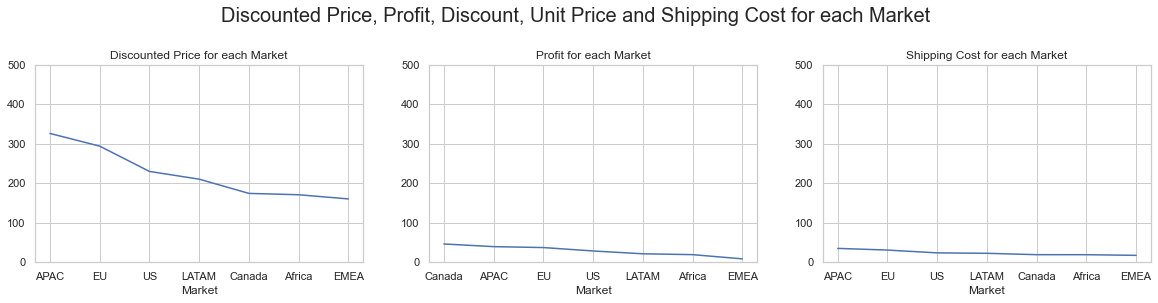

In [560]:
plt.figure(figsize=[20,8])

plt.suptitle('Discounted Price, Profit, Discount, Unit Price and Shipping Cost for each Market', size=20)

#line plot for profits
plt.subplot(2,3,1)
data.groupby('Market')['Discounted Price'].mean().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,500)
plt.title('Discounted Price for each Market')

plt.subplot(2,3,2)
data.groupby('Market')['Profit'].mean().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,500)
plt.title('Profit for each Market')


plt.subplot(2,3,3)
data.groupby('Market')['Shipping Cost'].mean().sort_values(ascending=False).plot(kind= 'line');
plt.ylim(0,500)
plt.title('Shipping Cost for each Market')

### Sales per market

In [495]:
data.groupby('Market')[['Discounted Price']].mean().sort_values('Discounted Price', ascending=False)

,Discounted Price
Market,
APAC,325.917481
EU,293.808906
US,229.858001
LATAM,210.278334
Canada,174.292109
Africa,170.868370
EMEA,160.302508


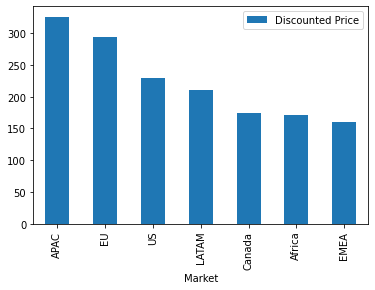

In [413]:
# Visualization of sales per market
data.groupby('Market')[['Discounted Price']].mean().sort_values('Discounted Price', ascending=False).plot(kind='bar');

### Profit per Market

In [498]:
data.groupby('Market')[['Profit']].mean().sort_values('Profit', ascending=False)

,Profit
Market,
Canada,46.399453
APAC,39.629163
EU,37.282974
US,28.656896
LATAM,21.531328
Africa,19.374674
EMEA,8.728966


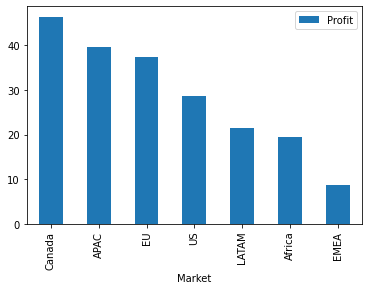

In [418]:
# Visualization of profit per market
data.groupby('Market')[['Profit']].mean().sort_values('Profit', ascending=False).plot(kind='bar');

In [394]:
# grouping by sales and profit by market and category
mark_cat = data.groupby(['Market','Category'], as_index=False)[['Discounted Price', 'Profit']].mean()

In [395]:
mark_cat

,Market,Category,Discounted Price,Profit
0,APAC,Furniture,553.286978,51.830445
1,APAC,Office Supplies,143.163321,17.081114
2,APAC,Technology,566.565203,85.389756
3,Africa,Furniture,308.479612,25.771926
4,Africa,Office Supplies,87.604444,9.353055
5,Africa,Technology,353.860640,48.440717
6,Canada,Furniture,252.268571,62.220000
7,Canada,Office Supplies,108.426282,28.727545
8,Canada,Technology,404.597077,111.486462
9,EMEA,Furniture,296.910047,14.979397


### Mean Sale by Market & Category

<Figure size 1080x576 with 0 Axes>

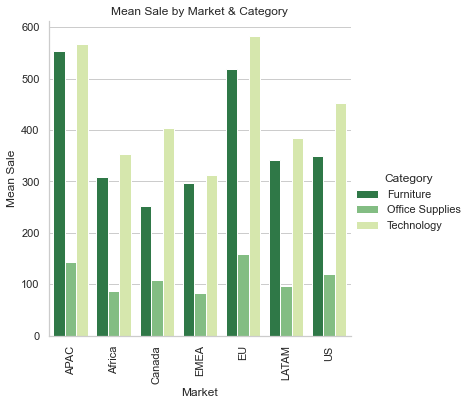

In [558]:
plt.figure(figsize = (15,8))

g = sns.catplot(data=mark_cat,
                kind="bar",
                x='Market',
                y='Discounted Price',
                hue='Category',
                ci="sd",
                palette='YlGn_r'
               )

plt.ylabel("Mean Sale")
plt.title("Mean Sale by Market & Category")
plt.xticks(rotation=90)
plt.show()

### Mean Profit by Market & Category

<Figure size 1080x576 with 0 Axes>

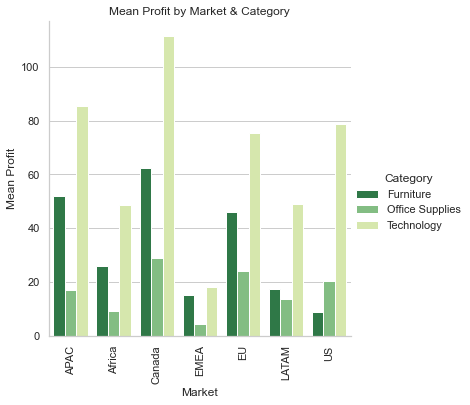

In [559]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (15,8))


g = sns.catplot(data=mark_cat,
                kind="bar",
                x='Market',
                y='Profit',
                hue='Category',
                ci="sd",
                palette='YlGn_r'
               )

plt.ylabel("Mean Profit")
plt.title("Mean Profit by Market & Category")
plt.xticks(rotation=90)
plt.show()

### Observation

+ The APAC market had the largest sales (but lots of losses)

+ The Canada market is the most profitable with no discounts or losses

+ The EMEA market is the least profitable but has the highest discounts and losses of over 1500 sales out of about 5000



+ Technology is the dominant product category in each Market for both sales and profit.

+ Technology and Furniture have very close sales margins however, technology has a wider margin when it comes to profits. Meaning tech products yield very large profits

+ Office supplies is the least dominant product category in each Market with regards to sales.
<b> And same for with profits </b> *except in the US where Furniture is the least

 

### Recommendation
+ Different Items in Categories should be tailored to the different markets they do best in. Not one size fits all.

+ Technology products must continue to be pushed in every market

### APAC Market

In [325]:
apac = market.get_group('APAC')

In [326]:
apac

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Row ID,,,,,,,,,,,
20295,Valerie Takahito,Home Office,APAC,Office Supplies,Paper,4,0.00,35.400,2013,197.280,49.32
20296,Valerie Takahito,Home Office,APAC,Furniture,Furnishings,7,0.00,21.420,2013,307.230,43.89
20297,Valerie Takahito,Home Office,APAC,Technology,Copiers,4,0.00,526.200,2013,1422.240,355.56
20298,Valerie Takahito,Home Office,APAC,Technology,Accessories,3,0.00,78.750,2013,207.450,69.15
20299,Sean O'Donnell,Consumer,APAC,Office Supplies,Appliances,2,0.15,37.014,2014,121.074,71.22
...,...,...,...,...,...,...,...,...,...,...,...
31292,Eleni McCrary,Corporate,APAC,Office Supplies,Labels,1,0.00,0.630,2013,6.570,6.57
31293,Phillina Ober,Home Office,APAC,Furniture,Bookcases,6,0.40,-870.300,2012,1582.200,439.50
31294,Phillina Ober,Home Office,APAC,Office Supplies,Labels,8,0.40,-6.624,2012,48.816,10.17


In [424]:
apac[apac['Profit'] < 0]

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Row ID,,,,,,,,,,,
20304,Maris LaWare,Consumer,APAC,Technology,Phones,5,0.40,-42.0600,2012,504.5400,168.18
20305,Maris LaWare,Consumer,APAC,Office Supplies,Art,1,0.40,-4.3560,2012,8.6940,14.49
20306,Scot Wooten,Consumer,APAC,Office Supplies,Supplies,3,0.45,-25.6590,2011,61.2810,37.14
20309,Scot Wooten,Consumer,APAC,Office Supplies,Envelopes,5,0.45,-5.7225,2011,51.7275,18.81
20310,Scot Wooten,Consumer,APAC,Furniture,Chairs,8,0.25,-152.2800,2011,600.8400,100.14
...,...,...,...,...,...,...,...,...,...,...,...
31284,Shirley Jackson,Consumer,APAC,Office Supplies,Binders,2,0.40,-4.3080,2013,7.0920,5.91
31293,Phillina Ober,Home Office,APAC,Furniture,Bookcases,6,0.40,-870.3000,2012,1582.2000,439.50
31294,Phillina Ober,Home Office,APAC,Office Supplies,Labels,8,0.40,-6.6240,2012,48.8160,10.17


In [353]:
apac.describe()

,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
count,11002.000000,11002.000000,11002.000000,11002.000000,11002.000000,11002.000000
mean,3.747137,0.148839,39.629163,2012.776313,325.917481,101.332949
std,2.257944,0.176359,170.519576,1.103024,551.633646,134.927021
min,1.000000,0.000000,-3009.435000,2011.000000,2.880000,3.870000
25%,2.000000,0.000000,-2.998500,2012.000000,47.083875,18.660000
50%,3.000000,0.100000,10.886250,2013.000000,122.697000,47.550000
75%,5.000000,0.270000,48.360000,2014.000000,347.869425,132.630000
max,14.000000,0.800000,2939.310000,2014.000000,6998.640000,925.230000


### Canada Market

In [322]:
canada = market.get_group('Canada')

In [355]:
canada.describe()

,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
count,384.000000,384.0,384.000000,384.000000,384.000000,384.000000
mean,2.169271,0.0,46.399453,2012.776042,174.292109,81.330313
std,1.792061,0.0,115.439881,1.077590,332.848799,107.678843
min,1.000000,0.0,0.000000,2011.000000,3.990000,3.990000
25%,1.000000,0.0,4.530000,2012.000000,26.302500,16.500000
50%,2.000000,0.0,12.345000,2013.000000,60.030000,32.070000
75%,2.000000,0.0,33.045000,2014.000000,170.820000,122.662500
max,12.000000,0.0,1159.020000,2014.000000,3863.880000,654.240000


In [323]:
canada

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Row ID,,,,,,,,,,,
41385,Greg Hansen,Consumer,Canada,Office Supplies,Binders,2,0.0,9.24,2014,20.16,10.08
41391,Don Miller,Corporate,Canada,Office Supplies,Storage,4,0.0,322.32,2012,848.40,212.10
41400,Natalie Fritzler,Consumer,Canada,Office Supplies,Paper,2,0.0,5.70,2013,57.00,28.50
41401,Natalie Fritzler,Consumer,Canada,Office Supplies,Binders,2,0.0,2.52,2013,31.68,15.84
41402,Natalie Fritzler,Consumer,Canada,Technology,Machines,1,0.0,79.86,2013,266.25,266.25
...,...,...,...,...,...,...,...,...,...,...,...
51014,Ruben Ausman,Corporate,Canada,Office Supplies,Labels,2,0.0,3.30,2011,23.70,11.85
51055,Vivian Mathis,Consumer,Canada,Office Supplies,Binders,1,0.0,1.71,2014,6.69,6.69
51056,Vivian Mathis,Consumer,Canada,Office Supplies,Art,1,0.0,18.33,2014,53.97,53.97


### EMEA Market

In [401]:
emea = market.get_group('EMEA')

In [403]:
emea.describe()

,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,2.290117,0.196083,8.728966,2012.812885,160.302508,89.868612
std,2.124118,0.286695,154.196926,1.098828,327.192343,123.851201
min,1.000000,0.000000,-4088.376000,2011.000000,1.440000,3.870000
25%,1.000000,0.000000,-7.584000,2012.000000,19.608000,16.980000
50%,1.000000,0.000000,5.040000,2013.000000,51.780000,45.210000
75%,2.000000,0.600000,24.840000,2014.000000,151.932000,121.440000
max,14.000000,0.700000,1622.880000,2014.000000,5211.120000,923.760000


In [425]:
emea[emea['Profit'] < 0]

,Customer Name,Segment,Market,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Discounted Price,Unit Price
Row ID,,,,,,,,,,,
41325,Aaron Smayling,Corporate,EMEA,Furniture,Furnishings,2,0.6,-126.072,2014,86.928,108.66
41326,Aaron Smayling,Corporate,EMEA,Office Supplies,Binders,1,0.6,-7.422,2014,21.168,52.92
41327,Aaron Smayling,Corporate,EMEA,Technology,Copiers,1,0.6,-87.948,2014,76.452,191.13
41328,Aaron Smayling,Corporate,EMEA,Technology,Copiers,2,0.6,-138.936,2014,154.344,192.93
41329,Aaron Smayling,Corporate,EMEA,Office Supplies,Storage,1,0.6,-5.328,2014,21.312,53.28
...,...,...,...,...,...,...,...,...,...,...,...
51276,Dean Braden,Consumer,EMEA,Technology,Accessories,1,0.6,-11.400,2013,16.860,42.15
51277,Muhammed Yedwab,Corporate,EMEA,Office Supplies,Supplies,1,0.6,-26.268,2013,19.452,48.63
51278,Muhammed Yedwab,Corporate,EMEA,Office Supplies,Fasteners,1,0.6,-4.818,2013,5.352,13.38


### Observation
+ Too much discount on product. Caused too huge a loss especially in the tech category

+ Lots of sales in terms of quantity in emea but the losses don't make it worth it.

### Recommendation
+ Company needs to focus more on quality and not quantity.
    + Meaning reduce discounts even if it means less people purchase but more overall sales and profit


Text(0.5, 1.0, 'EMEA')

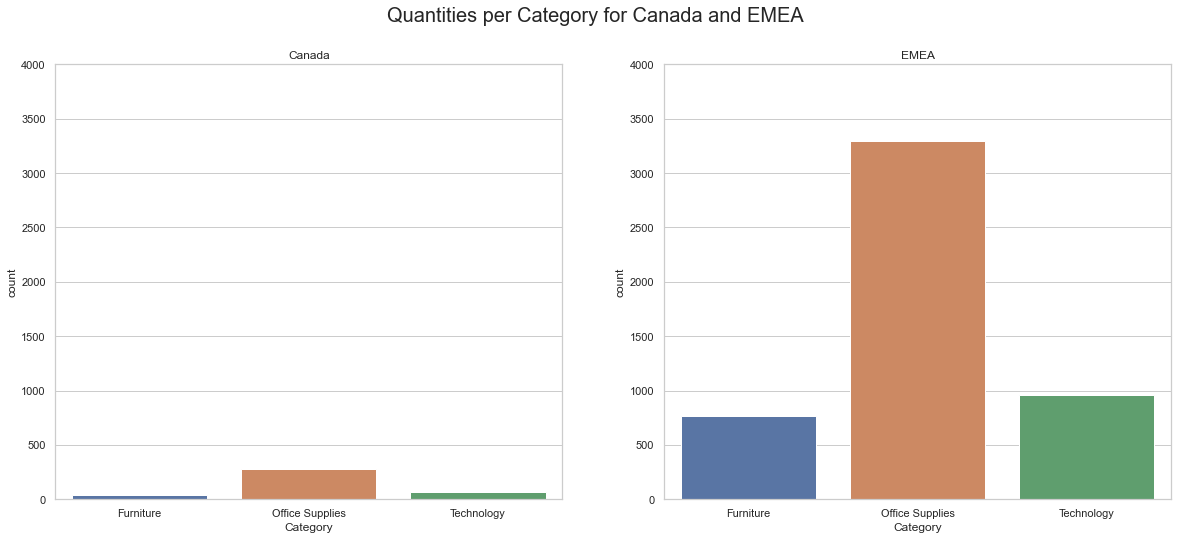

In [561]:
plt.figure(figsize=[20,8])

plt.suptitle('Quantities per Category for Canada and EMEA', size=20)

#line plot for profits
plt.subplot(1,2,1)
sns.countplot(x= canada['Category']);
plt.ylim(0,4000)
plt.title('Canada')

plt.subplot(1,2,2)
sns.countplot(x= emea['Category']);
plt.ylim(0,4000)
plt.title('EMEA')

### Best and Worst Sub-Categories for APAC, EMEA and Canada Markets

In [518]:
groups = data.groupby(['Market','Category'])[['Sub-Category','Discounted Price', 'Profit']]

In [519]:
groups.head()

,Sub-Category,Discounted Price,Profit
Row ID,,,
1,Labels,13.08,4.56
2,Furnishings,252.16,90.72
3,Bookcases,193.28,54.08
4,Binders,35.44,4.96
5,Art,71.60,11.44
...,...,...,...
41954,Machines,351.90,28.14
41955,Accessories,79.29,10.29
41957,Phones,303.66,75.90


### Technology (Best) Category for APAC Market

In [522]:
apac_tech = groups.get_group(('APAC','Technology'))

In [524]:
apac_tech['Sub-Category'].describe()

count            2396
unique              4
top       Accessories
freq              699
Name: Sub-Category, dtype: object

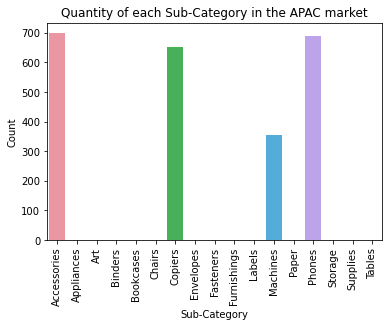

In [534]:
sns.countplot(x=apac_tech['Sub-Category'], data=apac_tech);

plt.ylabel("Count")
plt.title("Quantity of each Sub-Category in the APAC market")
plt.xticks(rotation=90)
plt.show()

### Technology (Best) Category for Canada Market

In [525]:
canada_tech = groups.get_group(('Canada','Technology'))

In [526]:
canada_tech['Sub-Category'].describe()

count         65
unique         4
top       Phones
freq          20
Name: Sub-Category, dtype: object

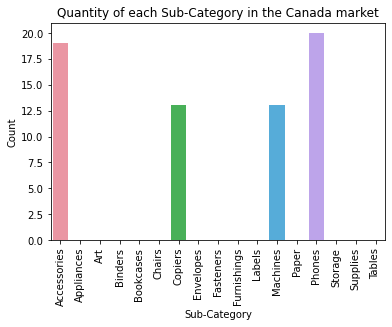

In [535]:
sns.countplot(x=canada_tech['Sub-Category'], data=canada_tech);

plt.ylabel("Count")
plt.title("Quantity of each Sub-Category in the Canada market")
plt.xticks(rotation=90)
plt.show()

### Technology (Best) Category for EMEA Market

In [528]:
emea_tech = groups.get_group(('EMEA','Technology'))

In [529]:
emea_tech['Sub-Category'].describe()

count        962
unique         4
top       Phones
freq         295
Name: Sub-Category, dtype: object

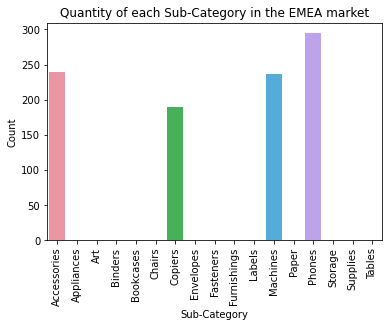

In [536]:
sns.countplot(x=emea_tech['Sub-Category'], data=emea_tech);

plt.ylabel("Count")
plt.title("Quantity of each Sub-Category in the EMEA market")
plt.xticks(rotation=90)
plt.show()

In [531]:
tech_cat = data[data['Category'] == 'Technology']

In [532]:
tech_cat['Sub-Category'].unique()

['Machines', 'Accessories', 'Copiers', 'Phones']
Categories (4, object): ['Machines', 'Accessories', 'Copiers', 'Phones']

### Observation

+ Accessories sub-category should be targetted to the APAC market and less
+ Phones should be targetted more to the Canadian Market

### Office Supplies (Worst) Category for APAC Market

In [539]:
apac_os = groups.get_group(('APAC','Office Supplies'))

In [540]:
apac_os

,Sub-Category,Discounted Price,Profit
Row ID,,,
20295,Paper,197.280,35.400
20299,Appliances,121.074,37.014
20300,Binders,11.400,2.820
20302,Labels,35.883,4.743
20303,Appliances,276.102,110.412
...,...,...,...
31289,Supplies,157.680,3.120
31290,Storage,396.840,59.520
31292,Labels,6.570,0.630


In [542]:
apac_os['Sub-Category'].describe()

count        6177
unique          9
top       Binders
freq          965
Name: Sub-Category, dtype: object

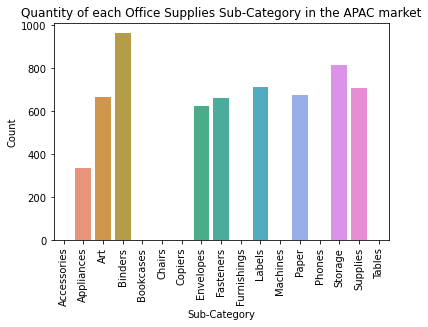

In [543]:
sns.countplot(x=apac_os['Sub-Category'], data=apac_os);

plt.ylabel("Count")
plt.title("Quantity of each Office Supplies Sub-Category in the APAC market")
plt.xticks(rotation=90)
plt.show()

### Office Supplies (Worst) Category for Canada Market

In [544]:
canada_os = groups.get_group(('Canada','Office Supplies'))

In [547]:
canada_os['Sub-Category'].describe()

count     277
unique      9
top       Art
freq       62
Name: Sub-Category, dtype: object

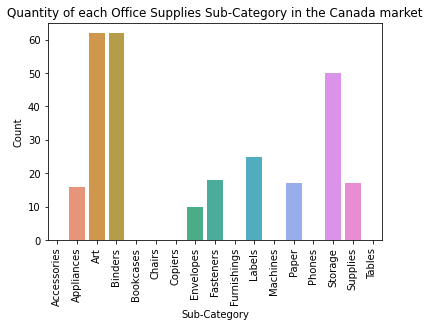

In [548]:
sns.countplot(x=canada_os['Sub-Category'], data=canada_os);

plt.ylabel("Count")
plt.title("Quantity of each Office Supplies Sub-Category in the Canada market")
plt.xticks(rotation=90)
plt.show()

### Office Supplies (Worst) Category for EMEA Market

In [549]:
emea_os = groups.get_group(('EMEA','Office Supplies'))

In [550]:
emea_os['Sub-Category'].describe()

count     3297
unique       9
top        Art
freq       696
Name: Sub-Category, dtype: object

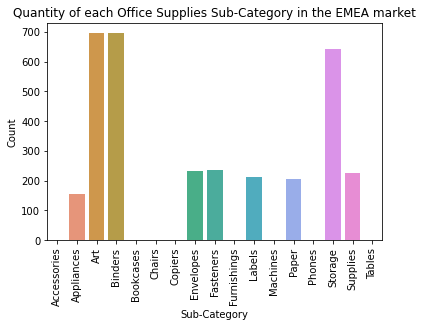

In [551]:
sns.countplot(x=emea_os['Sub-Category'], data=emea_os);

plt.ylabel("Count")
plt.title("Quantity of each Office Supplies Sub-Category in the EMEA market")
plt.xticks(rotation=90)
plt.show()

### Recommendation

+ Appliances in the EMEA and APAC Markets can be overlooked

+ Envelopes in the Canada Market can be overlooked

## Conclusion

This summary highlights key insights regarding market performance, product categories, sales trends, and profitability.

+ Accessories sub-category should target the APAC market more, while Phones should focus more on the Canadian market.
+ Excessive discounts, especially in the tech category, resulted in significant losses.
+ EMEA market has high sales quantity but unprofitable due to losses.
+ APAC market had the largest sales but also significant losses.
+ Canada market is the most profitable with no discounts or losses.
+ Technology dominates sales and profits across markets, yielding high profits.
+ Office supplies are the least dominant category in terms of both sales and profits.
+ December is the best performing month for sales, profit, and discounts, while February is the least performing.
+ Sales have a positive relationship with profit but a negative relationship with loss.
+ Technology category, particularly Machines, had the highest sales but also produced a loss.
+ Some outliers may be influencing sales data, and market regions with the same name could cause visualization errors.
+ There are as many losses as profits per year, potentially canceling out overall profits or leading to minimal profit or losses. 2013 recorded both the largest profit and the largest loss within the four-year period.


**Recommendations**
+ Run promotional campaigns, especially at the beginning of the year (e.g., Valentine's Day), to increase purchases, without necessarily offering huge discounts.
+ Consider overlooking appliances in the EMEA and APAC markets, and envelopes in the Canada market.
+ Focus on quality over quantity, meaning reducing discounts even if it decreases the number of purchases, aiming for higher overall sales and profit.
+ Tailor different items in categories to the markets they perform best in, rather than adopting a one-size-fits-all approach.
+ Continue pushing technology products in every market.
